#Library

In [ ]:
################ Import Libraries ###############################
#################################################################

import numpy as np
import torch

from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
from torch.distributions.normal import Normal
from torchvision import transforms
from torch.nn.modules.distance import PairwiseDistance
from copy import copy
import matplotlib.pyplot as plt

from datetime import time, date, datetime
import time
import pickle
import random
import sys
import itertools

import math
import matplotlib
from matplotlib.colors import ListedColormap

from mpl_toolkits.axisartist.axislines import SubplotZero
import warnings
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

import scipy
import scipy.io as io 
import copy

from mpl_toolkits.axisartist.axislines import SubplotZero
from scipy.integrate import quad
from scipy.stats import norm
from scipy.interpolate import interp1d
from sympy.combinatorics.graycode import GrayCode
import pickle as pkl
import os

from IPython import display
from pathlib import Path
from IPython.core.pylabtools import figsize
from numpy.core.fromnumeric import size


class AttrDict(dict):
    def __init__(self, *args, **kwargs):
        super(AttrDict, self).__init__(*args, **kwargs)
        self.__dict__ = self

def prepare_figure(plotsize = (10,10), dpii = 100):  
  fig = plt.figure(figsize=plotsize)
  x_lim=(-2,2)
  y_lim=(-2,2)
  plt.xlim(x_lim)   # set the xlim to left, right
  plt.ylim(y_lim)     # set the xlim to left, right
  plt.grid()

def plotRealConstellation(c,M,withlabel=False, plotsize = (5,5),dpii=75):  
    # Setup plot
    

    xs = np.arange(M)
    plt.scatter(c[:,0],c[:,1])

    if withlabel: 

        # zip joins x and y coordinates in pairs    
        for i in (xs):
            label = i#'{0:{fill}{width}b}'.format(i, fill='0', width=int(np.log2(order)))
            plt.annotate(label, # this is the text
                        (c[i,0],c[i,1]), # this is the point to label
                        textcoords="offset points", # how to position the text
                        xytext=(0,10), # distance from text to points (x,y)
                        ha='center') # horizontal alignment can be left, right or center
        
        # plt.xticks(xx)
        # plt.yticks(yy)
    plt.show()

def get_unNormalized_constellation(order,c_type):
    if order == 4:         
        if c_type == 'sqam' or c_type == 'SQAM':
            const = np.array([[1,1],[-1,1],[1,-1],[-1,-1]])

        if c_type == 'AEIMDD' or c_type == 'aeimdd':
            const = np.array([1.0620514154e+00,3.8638105616e-04,1.6014418602e+00,5.5446439981e-01])

        if c_type == 'pam' or c_type == 'PAM':
            const = np.array([[0,0],[1,0],[2,0],[3,0]])
        
        if c_type == 'IMDD' or c_type == 'IMDD':
            const = np.array([0, 1, np.sqrt(2), np.sqrt(3)])
    
    elif order == 8:
        if c_type == 'sqam' or c_type == 'SQAM':
            pt = np.sqrt(3.0)
            const = np.array([[pt,0],[1, 1],[-1, 1],[0, pt],
                              [1, -1],[0, -pt],[-pt, 0],[-1,-1]])
            
        if c_type == 'sqam2' or c_type == 'SQAM2':            
            const = np.array([[-3,-1],[-3, 1],[-1, -1],[-1, 1],
                              [3, -1],[3, 1],[1, -1],[1,1]])
        
        if c_type == 'psk' or c_type == 'PSK':            
                const = np.array([[ 2.0000e+00,  0.0000e+00],
                                  [ 1.4142e+00,  1.4142e+00],
                                  [-1.4142e+00,  1.4142e+00],
                                  [-8.7423e-08,  2.0000e+00],
                                  [ 1.4142e+00, -1.4142e+00],
                                  [ 2.3850e-08, -2.0000e+00],
                                  [-2.0000e+00, -1.7485e-07],
                                  [-1.4142e+00, -1.4142e+00]])

        if c_type == 'PHN22-1M' or c_type == 'PHN22-1M':            
                const = np.array([[-4.00,  2.05],
                                  [-4.30, -2.70],
                                  [ 0.30,  1.70],
                                  [-0.65, -1.55],
                                  [ 4.75,  2.25],
                                  [ 3.95, -2.05],
                                  [ 0.40,  5.30],
                                  [ 0.35, -5.3]])

        if c_type == 'PHN22-4M' or c_type == 'PHN22-4M':            
                const = np.array([[-4.90, -0.90],
                                  [-1.85, -4.45],
                                  [ 1.85,  4.70],
                                  [-2.20,  2.90],
                                  [ 4.80,  0.05],
                                  [ 2.00, -2.80],
                                  [ 1.50,  1.20],
                                  [-0.93 , -0.60]])

        if c_type == 'AEPN' or c_type == 'aepn':            
                const = np.array([[-1.2532, -0.1258],
                                  [-0.4484, -1.1564],
                                  [ 0.5503,  1.1590],
                                  [-0.5034,  0.6871],
                                  [ 1.2409,  0.0429],
                                  [ 0.4450, -0.6315],
                                  [ 0.3331,  0.2586],
                                  [-0.3644, -0.2340]])




    elif order == 16: 
        if c_type == 'sqam' or c_type == 'SQAM':
            const = np.array([[-3,-3],[-3,-1],[-3,3],[-3,1],
                                    [-1,-3],[-1,-1],[-1,3],[-1,1],
                                    [3,-3],[3,-1],[3,3],[3,1],[1,-3],
                                    [1,-1],[1,3],[1,1]])
        if c_type == 'ref10' or c_type == 'REF10':
            const = np.array([[-7.21,0],[-1.47,0],[1.47,0],[7.21,0],[0,3.46],
                              [0,6.9],[0,-3.46],[0,-6.9],[3.61,-2.34],[3.61,2.34],
                              [-3.61,2.34],[-3.61,-2.34],[5.26,5.5],[5.26,-5.5],
                              [-5.26,5.5],[-5.26,-5.5]])
        if c_type == 'PHN22-1M' or c_type == 'phn22-1m':
            const = np.array([[ -6.95,  4.6],
                            [-3.90,2.45],
                            [-5.7,-5.6],
                            [-6.75,-0.95],
                            [-2.4,6.95],
                            [-1.2,0.85],
                            [-1.45,-6.3],
                            [-2.95,-2.05],
                            [4.15,6.7],
                            [6.2,2],
                            [7.95,-3.5],
                            [4.55,-2.1],
                            [0.8,4.7],
                            [2.2,1.4],
                            [2.9,-6.5],
                            [1.2,-2.75]])
            
        if c_type == 'PHN22-2M' or c_type == 'phn22-2m':
            const = np.array([[-4.9, 2.50],
                            [-2.85,  1.35],
                            [-3.65, -4.25],
                            [-3.85, -1.25],
                            [-1.45,  4.65],
                            [-0.70,  2.50],
                            [-1.25, -2.90],
                            [-1.15, -0.45],
                            [ 4.85,  2.25],
                            [ 3.65, -0.21],
                            [ 3.90, -3.55],
                            [ 1.85, -2.15],
                            [ 2.00,  4.4],
                            [ 1.88,  1.80],
                            [ 0.40, -4.90],
                            [ 0.78, -0.15]])
            
        if c_type == 'PHN22-4M' or c_type == 'phn22-4m':
            const = np.array([[-4.55, 4.5],
                              [-4.87, -0.05],
                              [-5.2, -4.5],
                              [-3.05, -2.82],
                              [-2.1, 2.78],
                              [-1.75, 0.1],
                              [-0.6, -5.67],
                              [-0.62, -2.28],
                              [5.2, 3.51],
                              [3.18, 1.55],
                              [4.05, -5.8],
                              [5.1, -1.12],
                              [0.65, 4.5],
                              [0.67, 1.07],
                              [2.17, -3.78],
                              [1.66, -1.25]])
            
        if c_type == '4444N' or c_type == '4444n':
            const = np.array([[1.6,0],
                              [0,1.6],
                              [0,-1.6],
                              [-1.6,0],
                              [2.2, 2.2],
                              [-2.2, 2.2],
                              [2.2, -2.2],
                              [-2.2, -2.2],
                              [4.25,0],
                              [0,4.25],
                              [0,-4.25],
                              [-4.25, 0],
                              [3.8, 3.8],
                              [-3.8, 3.8],
                              [3.8,-3.8],
                              [-3.8,-3.8]])
            
        if c_type == 'ihqam' or c_type == 'IHQAM':
            x1 = np.sqrt(3)
            x2 = 2*x1
            const = np.array([[1,0],[3,0],[-1,0],[-3,0],
                    [-2,x1],[-2,-x1],[0,x1],
                    [0,-x1],[2,x1],[2,-x1],
                    [4,x1],[-4,-x1],[-1,x2],
                    [-1,-x2],[1,x2],[1,-x2]])
        
        if c_type == 'star1' or c_type == 'STAR1':
             const = np.array([[1.0000,         0],
                                [0.5000,         0],
                                [0.7071,    0.7071],
                                [0.3536,    0.3536],
                                [0.0000,    1.0000],
                                [0.0000,    0.5000],
                                [-0.7071,    0.7071],
                                [-0.3536,    0.3536],
                                [-1.0000,    0.0000],
                                [-0.5000,    0.0000],
                                [-0.7071,   -0.7071],
                                [-0.3536,   -0.3536],
                                [-0.0000,   -1.0000],
                                [-0.0000,   -0.5000],
                                [0.7071 ,  -0.7071],
                                [0.3536 ,  -0.3536]])

        if c_type == 'star2' or c_type == 'STAR2':
             const = np.array([[0.5000,         0],
                               [0.3536,    0.3536],
                               [0.3536 ,  -0.3536],
                               [-0.0000,   -0.5000],
                               [-0.3536,    0.3536],
                               [0.0000,    0.5000],
                               [-0.5000,    0.0000],
                               [-0.3536,   -0.3536],
                               [1.0000,         0],
                               [0.7071,    0.7071],
                               [0.7071 ,  -0.7071],
                               [-0.0000,   -1.0000],
                               [-0.7071,    0.7071],
                               [0.0000,    1.0000],
                               [-1.0000,    0.0000],
                               [-0.7071,   -0.7071],
                               ])

        if c_type == 'star3' or c_type == 'STAR3':
             const = np.array([[0.5000,         0],
                               [0.3536,    0.3536],
                               [-0.3536,    0.3536],
                               [-0.0000,   -0.5000],
                               [0.3536 ,  -0.3536],
                               [0.0000,   0.5000],
                               [-0.5000,    0.0000],
                               [-0.3536,   -0.3536],
                               [1.0000,         0],
                               [0.7071,    0.7071],
                               [-0.7071,    0.7071],
                               [0.0000,    1.0000],
                               [0.7071 ,  -0.7071],
                               [-0.0000,   -1.0000],
                               [-1.0000,    0.0000],
                               [-0.7071,   -0.7071],
                               ])


        if c_type == 'apsk' or c_type == 'APSK':
            const = np.array([[0,         0],
                                [1.0000,         0],
                                [0.7071,    0.7071],
                                [0.0000,    1.0000],
                                [-0.7071,    0.7071],
                                [-1.0000,    0.0000],
                                [-0.7071,   -0.7071],
                                [-0.0000,   -1.0000],
                                [0.7071 ,  -0.7071],
                                [0.5000 ,        0],
                                [0.3119 ,   0.3908],
                                [-0.1108,    0.4876],
                                [-0.4502,    0.2176],
                                [-0.4509,   -0.2160],
                                [-0.1125,   -0.4872],
                                [0.3106 ,  -0.3918 ]])


        if c_type == '1555' or c_type == '1555':
            const = np.array([[0,         0],
                            [0.2500,         0],
                            [0.5000,         0],
                            [0.7500,         0],
                            [0.0773,    0.2378],
                            [0.1545 ,   0.4755],
                            [0.2318 ,   0.7133],
                            [-0.2023,    0.1469],
                            [-0.4045,    0.2939],
                            [-0.6068,    0.4408],
                            [-0.2023,   -0.1469],
                            [-0.4045,   -0.2939],
                            [-0.6068,   -0.4408],
                            [0.0773 ,  -0.2378],
                            [0.1545 ,  -0.4755],
                            [0.2318 ,  -0.7133]])
        if c_type == '1456' or c_type == '1456':
            const = np.array([[0,             0],
                               [0.2500 ,       0],
                               [0.0000 ,  0.2500],
                               [-0.2500,  0.0000],
                               [-0.0000, -0.2500],
                               [0.5000 ,       0],
                               [0.1545 ,  0.4755],
                               [-0.4045,  0.2939],
                               [-0.4045, -0.2939],
                               [0.1545 , -0.4755],
                               [0.7500 ,       0],
                               [0.3750 ,  0.6495],
                               [-0.3750,  0.6495],
                               [-0.7500,  0.0000],
                               [-0.3750, -0.6495],
                               [0.3750,  -0.6495]])

        if c_type == 'ML' or c_type == 'ml':
            const = np.array([[-1.0930,  0.8367],
                    [-0.6291,  0.4452],
                    [-0.7380, -1.0919],
                    [-1.1986, -0.1733],
                    [-0.2466,  1.2450],
                    [-0.1558,  0.1569],
                    [-0.1017, -0.8144],
                    [-0.5663, -0.3029],
                    [ 0.6621,  1.0086],
                    [ 1.0042,  0.2579],
                    [ 1.3143, -0.4983],
                    [ 0.6632, -0.4509],
                    [ 0.0707,  0.6860],
                    [ 0.4360,  0.1795],
                    [ 0.4757, -1.1761],
                    [ 0.1030, -0.3080]])
        
        
        
        if c_type == 'ML4M' or c_type == 'ml4m':
            const = np.array([[-1.1064, 0.8767],
                               [-0.6448, 0.4518],
                               [-0.8275, -0.9924],
                               [-1.1369, -0.1011],
                               [-0.2180, 1.2804],
                               [-0.1730, 0.1364],
                               [-0.0697, -0.9111],
                               [-0.5315, -0.3507],
                               [ 0.6379, 0.9799],
                               [ 0.9885, 0.2542],
                               [ 1.2737, -0.4893],
                               [ 0.6681, -0.4545],
                               [ 0.0370, 0.6865],
                               [ 0.4149, 0.1623],
                               [ 0.5937, -1.1609], 
                               [ 0.0940, -0.3682]])



    elif order == 32:
        const = np.array([[-3,5],[-1,5],[-3,3],[-1,3],[3,5],
                                    [1,5],[3,3],[1,3],[-3,-5],[-1,-5],
                                    [-3,-3],[-1,-3],[3,-5],[1,-5],[3,-3],
                                    [1,-3],[-5,3],[-5,1],[-1,1],[-3,1],
                                    [5,3],[5,1],[1,1],[3,1],[-5,-3],
                                    [-5,-1],[-1,-1],[-3,-1],[5,-3],
                                    [5,-1],[1,-1],[3,-1]])
    
    elif order == 64:
        if c_type == 'sqam' or c_type == 'SQAM':
            const = np.array([[-7,-7],[-7,-5],[-7,-1],[-7,-3],[-7,7],
                                           [-7,5],[-7,1],[-7,3],[-5,-7],[-5,-5],
                                           [-5,-1],[-5,-3],[-5,7],[-5,5],[-5,1],
                                           [-5,3],[-1,-7],[-1,-5],[-1,-1],[-1,-3],
                                           [-1,7],[-1,5],[-1,1],[-1,3],[-3,-7],
                                           [-3,-5],[-3,-1],[-3,-3],[-3,7],[-3,5],
                                           [-3,1],[-3,3],[7,-7],[7,-5],[7,-1],
                                           [7,-3],[7,7],[7,5],[7,1],[7,3],
                                           [5,-7],[5,-5],[5,-1],[5,-3],[5,7],
                                           [5,5],[5,1],[5,3],[1,-7],[1,-5],
                                           [1,-1],[1,-3],[1,7],[1,5],[1,1],
                                           [1,3],[3,-7],[3,-5],[3,-1],[3,-3],
                                           [3,7],[3,5],[3,1],[3,3]])
        
        elif c_type == 'ihqam' or c_type == 'IHQAM':
            x1 = np.sqrt(3)
            x2 = 2*x1
            x3 = 3*x1
            x4 = 4*x1    
            const = np.array([[1,0],[0,x1],[0,-x1],[1,-x2],[0,x3],
                                            [1,x2],[1,x4],[0,-x3],[3,0],[2,x1],
                                            [2,-x1],[3,-x2],[2,x3],[3,x2],[3,x4],
                                            [2,-x3],[-1,0],[-2,x1],[-2,-x1],[-1,-x2],
                                            [-2,x3],[-1,x2],[-1,x4],[-2,-x3],[-3,0],
                                            [-4,x1],[-4,-x1],[-3,-x2],[-4,x3],[-3,x2],
                                            [-3,x4,],[-4,-x3],[7,0],[6,x1],[6,-x1],
                                            [7,-x2],[6,x3],[7,x2],[8,-x1],[6,-x3],
                                            [5,0],[4,x1],[4,-x1],[5,-x2],[4,x3],
                                            [5,x2],[3,-x4],[4,-x3],[-7,0],[-8,x1],
                                            [-8,-x1],[-7,-x2],[8,x1],[-7,x2],[-1,-x4],
                                            [1,-x4],[-5,0],[-6,x1],[-6,-x1],[-5,-x2],
                                            [-6,x3],[-5,x2],[-3,-x4],[-6,-x3]])

        elif c_type == 'hqam' or c_type == 'HQAM':
            y1 = np.sqrt(3)/2
            y2 = y1+np.sqrt(3)
            y3 = y2+np.sqrt(3)
            y4 = y3+np.sqrt(3)
            x1=0.5
            x2=1.5
            x3=2.5
            x4=3.5
            x5=4.5
            x6=5.5
            x7=6.5
            x8=7.5
            const = np.array([[x1,y1],[x2,y2],[x2,-y1],[x1,-y2],[x2,y4],[x1,y3],[x1,-y4],[x2,-y3],
                                            [x3,y1],[x4,y2],[x4,-y1],[x3,-y2],[x4,y4],[x3,y3],[x3,-y4],[x4,-y3],
                                            [-x2,y1],[-x1,y2],[-x1,-y1],[-x2,-y2],[-x1,y4],[-x2,y3],[-x2,-y4],[-x1,-y3],
                                            [-x4,y1],[-x3,y2],[-x3,-y1],[-x4,-y2],[-x3,y4],[-x4,y3],[-x4,-y4,],[-x3,-y3],
                                            [x7,y1],[x8,y2],[x8,-y1],[x7,-y2],[x8,y4],[x7,y3],[x7,-y4,],[x8,-y3],
                                            [x5,y1],[x6,y2],[x6,-y1],[x5,-y2],[x6,y4],[x5,y3],[x5,-y4],[x6,-y3],
                                            [-x8,y1],[-x7,y2],[-x7,-y1],[-x8,-y2],[-x7,y4],[-x8,y3],[-x8,-y4],[-x7,-y3],
                                            [-x6,y1],[-x5,y2],[-x5,-y1],[-x6,-y2],[-x5,y4],[-x6,y3],[-x6,-y4],[-x5,-y3],
                                            ])  
        
        elif c_type == 'star' or c_type == 'STAR':
            const = np.array([[+1.80, +0.35],
                            [+3.35, +0.65],
                            [+7.10, +1.35],
                            [+4.80, +0.90],
                            [+1.50, +1.00],
                            [+2.85, +1.85],
                            [+6.00, +3.95],
                            [+4.15, +2.70],
                            [+0.35, +1.80],
                            [+0.65, +3.35],
                            [+1.35, +7.10],#10
                            [+0.90, +4.80],
                            [+1.00, +1.50],
                            [+1.85, +2.85],
                            [+3.95, +6.00],
                            [+2.70, +4.15],
                            [-1.80, +0.35],
                            [-3.35, +0.65],
                            [-7.10, +1.35],
                            [-4.80, +0.90],
                            [-1.50, +1.00],#20
                            [-2.85, +1.85],
                            [-6.00, +3.95],
                            [-4.15, +2.70],
                            [-0.35, +1.80],
                            [-0.65, +3.35],
                            [-1.35, +7.10],
                            [-0.90, +4.80],
                            [-1.00, +1.50],
                            [-1.85, +2.85],
                            [-4.00, +5.95],#30
                            [-2.70, +4.15],
                            [+1.80, -0.35],
                            [+3.35, -0.65],
                            [+7.10, -1.35],
                            [+4.80, -0.90],
                            [+1.50, -1.00],
                            [+2.85, -1.85],
                            [+6.00, -3.95],
                            [+4.15, -2.70],
                            [+0.35, -1.80],#40
                            [+0.65, -3.35],
                            [+1.35, -7.10],
                            [+0.90, -4.80],
                            [+1.00, -1.50],
                            [+1.85, -2.85],
                            [+3.95, -6.00],
                            [+2.70, -4.15],
                            [-1.80, -0.35],
                            [-3.35, -0.65],
                            [-7.10, -1.35],#50
                            [-4.80, -0.90],
                            [-1.50, -1.00],
                            [-2.85, -1.85],
                            [-6.00, -3.95],
                            [-4.15, -2.70],
                            [-0.35, -1.80],
                            [-0.65, -3.35],
                            [-1.35, -7.10],
                            [-0.90, -4.80],
                            [-1.00, -1.50],#60
                            [-1.85, -2.85],
                            [-3.95, -6.00],
                            [-2.70, -4.15],                         
                            ])

        elif c_type == 'ML' or c_type == 'ml':
            const = np.array([[-0.5563,  1.3873],
                              [-1.3162,  0.7022],
                              [-1.0250, -0.1103],
                              [-1.1076,  0.2915],
                              [-0.4251, -1.4480],
                              [-1.0978, -1.0294],
                              [-1.4456, -0.0412],
                              [-1.1323, -0.5033],
                              [-0.6778,  1.0700],
                              [-0.9120,  0.7824],
                              [-0.8302,  0.1605],
                              [-0.7694,  0.4700],
                              [-0.4841, -1.0773],
                              [-0.7636, -0.7881],
                              [-0.6892, -0.1106],
                              [-0.7889, -0.4165],
                              [-0.2816,  1.0946],
                              [-0.1972,  0.8003],
                              [-0.2473,  0.2631],
                              [-0.1671,  0.5301],
                              [-0.2301, -0.8397],
                              [-0.1541, -0.5478],
                              [-0.1482, -0.0029],
                              [-0.1375, -0.2787],
                              [-0.1213,  1.4227],
                              [-0.5336,  0.7720],
                              [-0.5515,  0.2274],
                              [-0.4540,  0.4962],
                              [-0.0262, -1.2130],
                              [-0.4828, -0.6010],
                              [-0.4282, -0.0304],
                              [-0.4444, -0.3167],
                              [ 1.4943,  0.4405],
                              [ 1.0614,  0.5188],
                              [ 1.2145,  0.1048],
                              [ 0.9078,  0.1970],
                              [ 1.0247, -1.1421],
                              [ 1.1148, -0.6546],
                              [ 0.9821, -0.1630],
                              [ 1.3637, -0.3283],
                              [ 0.4960,  1.0116],
                              [ 0.7658,  0.7269],
                              [ 0.6224,  0.1083],
                              [ 0.6755,  0.4134],
                              [ 0.5622, -1.4647],
                              [ 0.7479, -0.8126],
                              [ 0.6857, -0.1827],
                              [ 0.8030, -0.4560],
                              [ 0.0938,  1.0183],
                              [ 0.1056,  0.7324],
                              [ 0.0558,  0.1985],
                              [ 0.1032,  0.4552],
                              [ 0.1028, -0.9208],
                              [ 0.1409, -0.6206],
                              [ 0.1309, -0.0757],
                              [ 0.1710, -0.3437],
                              [ 0.3055,  1.3208],
                              [ 0.4340,  0.7040],
                              [ 0.3436,  0.1426],
                              [ 0.3812,  0.4170],
                              [ 0.4376, -1.1169],
                              [ 0.4164, -0.7587],
                              [ 0.4080, -0.1423],
                              [ 0.4745, -0.4428]])

        elif c_type == 'PHN22-1M' or c_type == 'phn22-1m':
            const = np.array([[-3.33, 5.93],
                              [-4.98, 3.85],
                              [-4.23, 0.23],
                              [-4.74, 1.78],
                              [-2.3, -5.65],
                              [-4.24, -3.48],
                              [-6, -0.1],
                              [-4.33, -1.59],
                              [-2.9, 4.68],
                              [-3.43, 3.28],
                              [-3.1, 1.1],
                              [-3.2, 2.25],
                              [-1.92, -4.4],
                              [-2.9, -2.89],
                              [-2.7, -0.08],
                              [-3.23, -1.18],
                              [-0.88, 4.62],
                              [-0.79, 3.31],
                              [-0.8, 1.22],
                              [-0.65, 2.22],
                              [-0.95, -3.22],
                              [-0.48, -2.03],
                              [-0.64, 0.03],
                              [-0.62, -0.95],
                              [-0.98, 5.89],
                              [-1.98, 3.35],
                              [-1.95, 1.1],
                              [-1.8, 2.26],
                              [-0.07, -4.75],
                              [-1.98, -2.05],
                              [-1.7, -0.08],
                              [-1.62, -1.11],
                              [3.45, 5.59],
                              [4.8, 3.42],
                              [5.23, 1.28],
                              [4.02, 1.52],
                              [4, -3.69],
                              [4.68, -1.83],
                              [4.28, 0],
                              [6, -0.6],
                              [2.58, 4.43],
                              [3.35, 3.08],
                              [2.83, 0.89],
                              [2.82, 2.1],
                              [2.58, -5.29],
                              [2.86, -2.58],
                              [2.76, -0.38],
                              [3.1, -1.33],
                              [0.53, 4.28],
                              [0.63, 3.28],
                              [0.25, 1],
                              [0.52, 2.07],
                              [0.29, -3.4],
                              [0.6, -2.12],
                              [0.4, -0.2],
                              [.65, -1.11],
                              [1.07, 5.57],
                              [1.9, 3.27],
                              [1.5, 0.89],
                              [1.65, 2.02],
                              [1.6, -4.2],
                              [1.72, -2.6],
                              [1.63, -0.23],
                              [1.92, -1.33]])
        
        elif c_type == 'PHN22-4M' or c_type == 'phn22-4m':
            const = np.array([[-5.6, 3.2],
                            [-4.5, 2.34],
                            [-5, -0.38],
                            [-6.3, -0.22],
                            [-4.45, -5.55],
                            [-4.27, -2.55],
                            [-3.72, -0.9],
                            [-5.64, -3.05],
                            [-2.85, 4.85],
                            [-3.4, 2.08],
                            [-2.42, -0.18],
                            [-3.17, 0.6],
                            [-3.45, -4.67],
                            [-2.75, -3.7],
                            [-2.82, -1.3],
                            [-2.88, -2.48],
                            [0.1, 5.64],
                            [-0.47, 2.12],
                            [-0.48, -0.01],
                            [-0.8, 0.85],
                            [-1.7, -6.7],
                            [-0.27, -3.28],
                            [-0.6, -1.1],
                            [-0.3, -2.3],
                            [-2.02, 3.83],
                            [-1.8, 2.58],
                            [-1.4, -0.15],
                            [-1.98, 1.22],
                            [-1.43, -5.33],
                            [-1.37, -4],
                            [-1.53, -1.55],
                            [-1.63, -2.74],
                            [3.65, 5],
                            [5.6, 2.73],
                            [5.05, -0.75],
                            [4.58, 2],
                            [3.92, -6.59],
                            [5.6, -3.89],
                            [6.43, -1.02],
                            [4.4, -3.18],
                            [2.75, 3.88],
                            [3.15, 1.8],
                            [3.88, -0.38],
                            [2.7, 0.62],
                            [3.12, -5.5],
                            [2.57, -4.3],
                            [2.8, -1.08],
                            [3.62, -2.2],
                            [0.32, 4.25],
                            [-0.12, 3.15],
                            [0.57, -0.12],
                            [0.38, 1],
                            [0.58, -4.45],
                            [1.02, -3.37],
                            [0.52, -1.18],
                            [0.82, -2.12],
                            [1.85, 3.08],
                            [1.3, 2.08],
                            [1.75, -0.1],
                            [1.47, 1.13],
                            [0.9, -5.8],
                            [2.23, -3.25],
                            [1.55, -1.15],
                            [1.97, -2.32],          
            ])
              
        elif c_type == 'REF' or c_type == 'ref':
            const = np.array([[ 0.2869126,  -0.19840987],
                              [ 0.09287653, -0.04635496],
                              [-0.6812418,  -0.12231459],
                              [ 1.0224216,   1.0035702 ],
                              [-0.48332584, -0.8283378 ],
                              [ 1.0592265,   0.17643997],
                              [-0.34058815,  0.5971561 ],
                              [ 0.68814844,  0.24573223],
                              [-0.00449386,  0.7352762 ],
                              [ 0.6088864 ,  0.5866411 ],
                              [-0.44578204,  0.916924  ],
                              [-0.6810789 ,  0.6996482 ],
                              [-0.9411929 , -0.3927862 ],
                              [-0.3224213 , -0.5949004 ],
                              [ 0.22853073,  1.0321294 ],
                              [-1.1452351 , -0.8910608 ],
                              [ 0.4211428 , -1.3633928 ],
                              [-0.03062068, -0.21254319],
                              [-1.4429991 ,  0.13997371],
                              [-0.0672222 , -0.4753008 ],
                              [ 0.524738  , -0.5069226 ],
                              [ 0.56285226, -0.8882667 ],
                              [ 0.5694687 ,  1.3662443 ],
                              [ 0.2617456 , -0.71586144],
                              [ 0.2674517 ,  0.68370855],
                              [-0.58125424,  0.3490569 ],
                              [ 1.0706843 , -0.2755383 ],
                              [ 1.3389109 ,  0.53686875],
                              [ 0.8893113 , -1.183198  ],
                              [-0.6945037 , -1.2200669 ],
                              [-0.79985374, -0.7043453 ],
                              [ 0.12121776,  0.18234986],
                              [-0.2562087 , -1.0506887 ],
                              [ 1.4222907 , -0.5271113 ],
                              [-0.13688165,  0.4807543 ],
                              [-0.02319364, -0.75556654],
                              [ 0.50930935, -0.10650638],
                              [-0.9080362 ,  0.51489216],
                              [-0.24674013, -0.08708971],
                              [ 0.994264  , -0.7772951 ],
                              [-0.35623935,  0.2842163 ],
                              [ 0.7930599 , -0.09238066],
                              [ 1.4258966 , -0.00401456],
                              [ 0.01325349,  1.4188411 ],
                              [ 0.21769597, -0.4487721 ],
                              [ 0.14388391, -1.0504031 ],
                              [-1.4099426 , -0.39803147],
                              [ 0.74518645, -0.47298706],
                              [ 0.10684847,  0.38798857],
                              [-0.9551972 ,  1.0525827 ],
                              [-0.5729521 , -0.4229455 ],
                              [-0.866745  ,  0.242721  ],
                              [-0.16500647, -1.468452  ],
                              [-0.1647697 ,  0.12720945],
                              [ 0.9219012 ,  0.5879329 ],
                              [-0.13480821,  1.0400746 ],
                              [-0.5424594 ,  0.02283738],
                              [-1.05803   , -0.02096684],
                              [ 0.37137744,  0.39567122],
                              [ 0.39710748,  0.14217377],
                              [ 0.5921545 ,  0.9246992 ],
                              [-0.3394847 , -0.2987934 ],
                              [-0.48659724,  1.3218362 ],
                              [-1.2812624 ,  0.60588837]])
  
        elif c_type == 'ARIZONA' or c_type == 'arizona':
            const = np.array([[ 0.1359,  0.0621],
                              [-0.0220,  0.3241],
                              [-0.0041, -0.1691],
                              [ 0.1489, -0.3952],
                              [-0.0111,  0.9336],
                              [ 0.1305,  0.6000],
                              [ 0.1945,  1.3392],
                              [-0.1352, -0.7300],
                              [ 0.4328,  0.0470],
                              [ 0.2863,  0.3157],
                              [ 0.2892, -0.1788],
                              [ 0.4086, -0.5023],
                              [ 0.3024,  0.9191],
                              [ 0.4477,  0.5838],
                              [ 0.6090,  1.2614],
                              [ 0.1624, -0.6723],
                              [-0.1518,  0.0590],
                              [-0.2965,  0.3054],
                              [-0.2833, -0.2279],
                              [-0.1050, -0.4453],
                              [-0.3372,  0.9287],
                              [-0.1685,  0.6084],
                              [-0.2220,  1.3379],
                              [-0.1782, -1.0582],
                              [-0.4371,  0.0252],
                              [-0.6045,  0.2765],
                              [-0.5687, -0.2855],
                              [-0.3928, -0.5263],
                              [-0.6677,  0.8463],
                              [-0.4799,  0.5709],
                              [-0.6812,  1.2703],
                              [-0.4671, -0.8437],
                              [ 1.0716, -0.0604],
                              [ 0.9789,  0.2801],
                              [ 0.9097, -0.3496],
                              [ 1.1401, -0.7198],
                              [ 1.0120,  1.0125],
                              [ 1.2449,  0.6130],
                              [ 1.3822, -0.3219],
                              [ 0.8416, -1.0162],
                              [ 0.7472,  0.0079],
                              [ 0.6072,  0.3068],
                              [ 0.5831, -0.2669],
                              [ 0.7177, -0.6062],
                              [ 0.6393,  0.8639],
                              [ 0.8237,  0.5796],
                              [ 0.4876, -1.3054],
                              [ 0.4619, -0.8601],
                              [-1.0855, -0.0509],
                              [-1.4045,  0.1578],
                              [-1.3580, -0.3344],
                              [-1.1423, -0.7012],
                              [ 1.4254,  0.1771],
                              [-1.2604,  0.5626],
                              [ 0.0135, -1.4259],
                              [ 0.1557, -1.0143],
                              [-0.7452, -0.0204],
                              [-0.9492,  0.2543],
                              [-0.8990, -0.3487],
                              [-0.7152, -0.6200],
                              [-1.0505,  0.9357],
                              [-0.8312,  0.5620],
                              [-0.4994, -1.3020],
                              [-0.8598, -1.0153]])
        
        elif c_type == 'honeycomb' or c_type == 'HONEYCOMB':
            const = np.array([[-10.392304845413264,-2.],
                              [-10.392304845413264, 2.],
                              [-8.660254037844386, -5.],
                              [-8.660254037844386, -1.],
                              [-8.660254037844386,  1.],
                              [-8.660254037844386, 	5.],
                              [-6.928203230275509, -4.],
                              [-6.928203230275509, -2.],
                              [-6.928203230275509,  2.],
                              [-6.928203230275509,  4.],
                              [-5.196152422706632, -7.],
                              [-5.196152422706632, -5.],
                              [-5.196152422706632, -1.],
                              [-5.196152422706632,	1.],
                              [-5.196152422706632,	5.],
                              [-5.196152422706632,	7.],
                              [-3.4641016151377544,-8.],
                              [-3.4641016151377544,-4.],
                              [-3.4641016151377544,-2.],
                              [-3.4641016151377544,	2.],
                              [-3.4641016151377544,	4.],
                              [-3.4641016151377544,	8.],
                              [-1.7320508075688772,-7.],
                              [-1.7320508075688772,-5.],
                              [-1.7320508075688772,-1.],
                              [-1.7320508075688772,	1.],
                              [-1.7320508075688772,	5.],
                              [-1.7320508075688772,7.],
                              [0.,	-10.],
                              [0.,	-8.],
                              [0.,	-4.],
                              [0.,	-2.],
                              [0.,	2.],
                              [0.,	4.],
                              [0.,	8.],
                              [0.,	10.],
                              [1.7320508075688772,	-7.],
                              [1.7320508075688772,	-5.],
                              [1.7320508075688772,	-1.],
                              [1.7320508075688772,	1.],
                              [1.7320508075688772,	5.],
                              [1.7320508075688772,	7.],
                              [3.4641016151377544,	-8.],
                              [3.4641016151377544,	-4.],
                              [3.4641016151377544,	-2.],
                              [3.4641016151377544,	2.],
                              [3.4641016151377544,	4.],
                              [3.4641016151377544,	8.],
                              [5.196152422706632,	-7.],
                              [5.196152422706632,	-5.],
                              [5.196152422706632,	-1.],
                              [5.196152422706632,	1.],
                              [5.196152422706632,	5.],
                              [5.196152422706632,	7.],
                              [6.928203230275509,	-4.],
                              [6.928203230275509,	-2.],
                              [6.928203230275509,	2.],
                              [6.928203230275509,	4.],
                              [8.660254037844386,	-5.],
                              [8.660254037844386,	-1.],
                              [8.660254037844386,	1.],
                              [8.660254037844386,	5.],
                              [10.392304845413264,	-2.],
                              [10.392304845413264,	2.]])  

        elif c_type == 'CRICA' or c_type == 'crica':
            const = np.array([[-8.235740954498494,	-1.0000000000000002],
                              [-8.235740954498494,	1.0000000000000002],
                              [-7.75710962592338,	-2.9418836348521045],
                              [-7.75710962592338,	2.9418836348521045],
                              [-6.827663281835842,	-4.7127956861585245],
                              [-6.827663281835842,	4.7127956861585245],
                              [-6.157478480644625,	-0.5102232136459717],
                              [-5.989518519041068,	1.516752081722304],
                              [-5.658180105747559,	-2.481907906886837],
                              [-5.501417965354252,	-6.209817182500727],
                              [-5.501417965354252,	6.209817182500727],
                              [-5.1725012889439625,	3.379363754202542],
                              [-4.545730120682499,	-4.184639367647436],
                              [-4.148114905279378,	0.5036723384328415],
                              [-3.907041544768732,	-1.4817454097632667],
                              [-3.8554502335669385,	-7.345946675963039],
                              [-3.8554502335669385,	7.345946675963039],
                              [-3.794963284562845,	4.8757689276835965],
                              [-3.4389051311943066,	2.3737048238036715],
                              [-2.940679742771269,	-5.433900221553536],
                              [-2.77091205130642,	-3.1277131415505797],
                              [-2.006182123376858,	5.843808882500178],
                              [-1.9854177481961084,	-8.055156450048111],
                              [-1.9854177481961084,	8.055156450048111],
                              [-1.9418836348521045,	3.699950140285262],
                              [-1.7320508075688772,	-1.],
                              [-1.7320508075688772,	1.],
                              [-1.0169610853832087,	-6.094313670805029],
                              [-1.0000000000000002,	-4.057159485638117],
                              [0.,	-8.296229810558756],
                              [0.,	-2.],
                              [0.,	2.],
                              [0.,	4.1785814688603775],
                              [0.,	6.1785814688603775],
                              [0.,	8.296229810558756],
                              [1.0000000000000002,	-4.057159485638117],
                              [1.0169610853832087,	-6.094313670805029],
                              [1.7320508075688772,	-1.],
                              [1.7320508075688772,	1.],
                              [1.9418836348521045,	3.699950140285262],
                              [1.9854177481961084,	-8.055156450048111],
                              [1.9854177481961084,	8.055156450048111],
                              [2.006182123376858,	5.843808882500178],
                              [2.77091205130642,	-3.1277131415505797],
                              [2.940679742771269,	-5.433900221553536],
                              [3.4389051311943066,	2.3737048238036715],
                              [3.794963284562845,	4.8757689276835965],
                              [3.8554502335669385,	-7.345946675963039],
                              [3.8554502335669385,	7.345946675963039],
                              [3.907041544768732,	-1.4817454097632667],
                              [4.148114905279378,	0.5036723384328415],
                              [4.545730120682499,	-4.184639367647436],
                              [5.1725012889439625,	3.379363754202542],
                              [5.501417965354252,	-6.209817182500727],
                              [5.501417965354252,	6.209817182500727],
                              [5.658180105747559,	-2.481907906886837],
                              [5.989518519041068,	1.516752081722304],
                              [6.157478480644625,	-0.5102232136459717],
                              [6.827663281835842,	-4.7127956861585245],
                              [6.827663281835842,	4.7127956861585245],
                              [7.75710962592338,	-2.9418836348521045],
                              [7.75710962592338,	2.9418836348521045],
                              [8.235740954498494,	-1.0000000000000002],
                              [8.235740954498494,	1.0000000000000002]])

        elif c_type == 'cross' or c_type == 'CROSS':
            const = np.array([[-9., -2.],
                              [-9.,	2.],
                              [-7.,	-4.],
                              [-7.,	-2.],
                              [-7.,	0.],
                              [-7.,	2.],
                              [-7.,	4.],
                              [-5.,	-6.],
                              [-5.,	-4.],
                              [-5.,	-2.],
                              [-5.,	0.],
                              [-5.,	2.],
                              [-5.,	4.],
                              [-5.,	6.],
                              [-3.,	-8.],
                              [-3.,	-6.],
                              [-3.,	-4.],
                              [-3.,	-2.],
                              [-3.,	0.],
                              [-3.,	2.],
                              [-3.,	4.],
                              [-3.,	6.],
                              [-3.,	8.],
                              [-1.,	-8.],
                              [-1.,	-6.],
                              [-1.,	-4.],
                              [-1.,	-2.],
                              [-1.,	0.],
                              [-1.,	2.],
                              [-1.,	4.],
                              [-1.,	6.],
                              [-1.,	8.],
                              [1.,	-8.],
                              [1.,	-6.],
                              [1.,	-4.],
                              [1.,	-2.],
                              [1.,	0.],
                              [1.,	2.],
                              [1.,	4.],
                              [1.,	6.],
                              [1.,	8.],
                              [3.,	-8.],
                              [3.,	-6.],
                              [3.,	-4.],
                              [3.,	-2.],
                              [3.,	0.],
                              [3.,	2.],
                              [3.,	4.],
                              [3.,	6.],
                              [3.,	8.],
                              [5.,	-6.],
                              [5.,	-4.],
                              [5.,	-2.],
                              [5.,	0.],
                              [5.,	2.],
                              [5.,	4.],
                              [5.,	6.],
                              [7.,	-4.],
                              [7.,	-2.],
                              [7.,	0.],
                              [7.,	2.],
                              [7.,	4.],
                              [9.,	-2.],
                              [9.,	2.]])

        elif c_type == 'voronoi' or c_type == 'VORONOI':
            const = np.array([[-7.25,	-3.4641016151377544],
                              [-7.25,	0.],
                              [-7.25,	3.4641016151377544],
                              [-6.25,	-5.196152422706632],
                              [-6.25,	-1.7320508075688772],
                              [-6.25,	1.7320508075688772],
                              [-6.25,	5.196152422706632],
                              [-5.25,	-3.4641016151377544],
                              [-5.25,	0.],
                              [-5.25,	3.4641016151377544],
                              [-4.25,	-5.196152422706632],
                              [-4.25,	-1.7320508075688772],
                              [-4.25,	1.7320508075688772],
                              [-4.25,	5.196152422706632],
                              [-3.25,	-6.928203230275509],
                              [-3.25,	-3.4641016151377544],
                              [-3.25,	0.],
                              [-3.25,	3.4641016151377544],
                              [-3.25,	6.928203230275509],
                              [-2.25,	-5.196152422706632],
                              [-2.25,	-1.7320508075688772],
                              [-2.25,	1.7320508075688772],
                              [-2.25,	5.196152422706632],
                              [-1.25,	-6.928203230275509],
                              [-1.25,	-3.4641016151377544],
                              [-1.25,	0.],
                              [-1.25,	3.4641016151377544],
                              [-1.25,	6.928203230275509],
                              [-0.25,	-8.660254037844386],
                              [-0.25,	-5.196152422706632],
                              [-0.25,	-1.7320508075688772],
                              [-0.25,	1.7320508075688772],
                              [-0.25,	5.196152422706632],
                              [-0.25,	8.660254037844386],
                              [0.75,	-6.928203230275509],
                              [0.75,	-3.4641016151377544],
                              [0.75,	0.],
                              [0.75,	3.4641016151377544],
                              [0.75,	6.928203230275509],
                              [1.75,	-5.196152422706632],
                              [1.75,	-1.7320508075688772],
                              [1.75,	1.7320508075688772],
                              [1.75,	5.196152422706632],
                              [2.75,	-6.928203230275509],
                              [2.75,	-3.4641016151377544],
                              [2.75,	0.],
                              [2.75,	3.4641016151377544],
                              [2.75,	6.928203230275509],
                              [3.75,	-5.196152422706632],
                              [3.75,	-1.7320508075688772],
                              [3.75,	1.7320508075688772],
                              [3.75,	5.196152422706632],
                              [4.75,	-3.4641016151377544],
                              [4.75,	0.],
                              [4.75,	3.4641016151377544],
                              [5.75,	-5.196152422706632],
                              [5.75,	-1.7320508075688772],
                              [5.75,	1.7320508075688772],
                              [5.75,	5.196152422706632],
                              [6.75,	-3.4641016151377544],
                              [6.75,	0.],
                              [6.75,	3.4641016151377544],
                              [7.75,	-1.7320508075688772],
                              [7.75,	1.7320508075688772]])

        elif c_type == 'crica2' or c_type == 'CRICA2':
            const = np.array([[-8.235740954498494,	-1.0000000000000002],
                              [-8.235740954498494,	1.0000000000000002],
                              [-7.75710962592338,	-2.9418836348521045],
                              [-7.75710962592338,	2.9418836348521045],
                              [-6.827663281835842,	-4.7127956861585245],
                              [-6.827663281835842,	4.7127956861585245],
                              [-6.157478480644625,	-0.5102232136459717],
                              [-5.989518519041068,	1.516752081722304],
                              [-5.658180105747559,	-2.481907906886837],
                              [-5.501417965354252,	-6.209817182500727],
                              [-5.501417965354252,	6.209817182500727],
                              [-5.1725012889439625,	3.379363754202542],
                              [-4.545730120682499,	-4.184639367647436],
                              [-4.148114905279378,	0.5036723384328415],
                              [-3.907041544768732,	-1.4817454097632667],
                              [-3.8554502335669385,	-7.345946675963039],
                              [-3.8554502335669385,	7.345946675963039],
                              [-3.794963284562845,	4.8757689276835965],
                              [-3.4389051311943066,	2.3737048238036715],
                              [-2.940679742771269,	-5.433900221553536],
                              [-2.77091205130642,	-3.1277131415505797],
                              [-2.006182123376858,	5.843808882500178],
                              [-1.9854177481961084,	-8.055156450048111],
                              [-1.9854177481961084,	8.055156450048111],
                              [-1.9418836348521045,	3.699950140285262],
                              [-1.7320508075688772,	-1.],
                              [-1.7320508075688772,	1.],
                              [-1.0169610853832087,	-6.094313670805029],
                              [-1.0000000000000002,	-4.057159485638117],
                              [0.,	-8.296229810558756],
                              [0.,	-2.],
                              [0.,	2.],
                              [0.,	4.1785814688603775],
                              [0.,	6.1785814688603775],
                              [0.,	8.296229810558756],
                              [1.0000000000000002,	-4.057159485638117],
                              [1.0169610853832087,	-6.094313670805029],
                              [1.7320508075688772,	-1.],
                              [1.7320508075688772,	1.],
                              [1.9418836348521045,	3.699950140285262],
                              [1.9854177481961084,	-8.055156450048111],
                              [1.9854177481961084,	8.055156450048111],
                              [2.006182123376858,	5.843808882500178],
                              [2.77091205130642,	-3.1277131415505797],
                              [2.940679742771269,	-5.433900221553536],
                              [3.4389051311943066,	2.3737048238036715],
                              [3.794963284562845,	4.8757689276835965],
                              [3.8554502335669385,	-7.345946675963039],
                              [3.8554502335669385,	7.345946675963039],
                              [3.907041544768732,	-1.4817454097632667],
                              [4.148114905279378,	0.5036723384328415],
                              [4.545730120682499,	-4.184639367647436],
                              [5.1725012889439625,	3.379363754202542],
                              [5.501417965354252,	-6.209817182500727],
                              [5.501417965354252,	6.209817182500727],
                              [5.658180105747559,	-2.481907906886837],
                              [5.989518519041068,	1.516752081722304],
                              [6.157478480644625,	-0.5102232136459717],
                              [6.827663281835842,	-4.7127956861585245],
                              [6.827663281835842,	4.7127956861585245],
                              [7.75710962592338,	-2.9418836348521045],
                              [7.75710962592338,	2.9418836348521045],
                              [8.235740954498494,	-1.0000000000000002],
                              [8.235740954498494,	1.0000000000000002]])

        elif c_type == 'c2' or c_type == 'C2':
            const = np.array([[-8.,	-1.7320508075688772],
                              [-8.,	1.7320508075688772],
                              [-7.,	-3.4641016151377544],
                              [-7.,	0.],
                              [-7.,	3.4641016151377544],
                              [-6.,	-5.196152422706632],
                              [-6.,	-1.7320508075688772],
                              [-6.,	1.7320508075688772],
                              [-6.,	5.196152422706632],
                              [-5.,	-3.4641016151377544],
                              [-5.,	0.],
                              [-5.,	3.4641016151377544],
                              [-4.,	-5.196152422706632],
                              [-4.,	-1.7320508075688772],
                              [-4.,	1.7320508075688772],
                              [-4.,	5.196152422706632],
                              [-3.,	-6.928203230275509],
                              [-3.,	-3.4641016151377544],
                              [-3.,	0.],
                              [-3.,	3.4641016151377544],
                              [-3.,	6.928203230275509],
                              [-2.,	-5.196152422706632],
                              [-2.,	-1.7320508075688772],
                              [-2.,	1.7320508075688772],
                              [-2.,	5.196152422706632],
                              [-1.,	-6.928203230275509],
                              [-1.,	-3.4641016151377544],
                              [-1.,	0.],
                              [-1.,	3.4641016151377544],
                              [-1.,	6.928203230275509],
                              [0.,	-5.196152422706632],
                              [0.,	-1.7320508075688772],
                              [0.,	1.7320508075688772],
                              [0.,	5.196152422706632],
                              [1.,	-6.928203230275509],
                              [1.,	-3.4641016151377544],
                              [1.,	0.],
                              [1.,	3.4641016151377544],
                              [1.,	6.928203230275509],
                              [2.,	-5.196152422706632],
                              [2.,	-1.7320508075688772],
                              [2.,	1.7320508075688772],
                              [2.,	5.196152422706632],
                              [3.,	-6.928203230275509],
                              [3.,	-3.4641016151377544],
                              [3.,	0.],
                              [3.,	3.4641016151377544],
                              [3.,	6.928203230275509],
                              [4.,	-5.196152422706632],
                              [4.,	-1.7320508075688772],
                              [4.,	1.7320508075688772],
                              [4.,	5.196152422706632],
                              [5.,	-3.4641016151377544],
                              [5.,	0.],
                              [5.,	3.4641016151377544],
                              [6.,	-5.196152422706632],
                              [6.,	-1.7320508075688772],
                              [6.,	1.7320508075688772],
                              [6.,	5.196152422706632],
                              [7.,	-3.4641016151377544],
                              [7.,	0.],
                              [7.,	3.4641016151377544],
                              [8.,	-1.7320508075688772],
                              [8.,	1.7320508075688772]])
     
    elif order == 256:       
        if c_type == 'ab4' or c_type == 'AB4':
          const = np.array([[-5.,-3.,	-1.,	1.],
                            [-5.,	-3.,	1.,	-1.],
                            [-5.,	-1.,	-3.,	1.],
                            [-5.,	-1.,	-1.,	-1.],
                            [-5.,	-1.,	-1.,	3.],
                            [-5.,	-1.,	1.,	-3.],
                            [-5.,	-1.,	1.,	1.],
                            [-5.,	-1.,	3.,	-1.],
                            [-5.,	1.,	-3.,	-1.],
                            [-5.,	1.,	-1.,	-3.],
                            [-5.,	1.,	-1.,	1.],
                            [-5.,	1.,	1.,	-1.],
                            [-5.,	1.,	1.,	3.],
                            [-5.,	1.,	3.,	1.],
                            [-5.,	3.,	-1.,	-1.],
                            [-5.,	3.,	1.,	1.],
                            [-3.,	-5.,	-1.,	1.,],
                            [-3.,	-5.,	1.,	-1.],
                            [-3.,	-3.,	-3.,	-3.],
                            [-3.,	-3.,	-3.,	1.],
                            [-3.,	-3.,	-1.,	-1.],
                            [-3.,	-3.,	-1.,	3.],
                            [-3.,	-3.,	1.,	-3.],
                            [-3.,	-3.,	1.,	1.],
                            [-3.,	-3.,	3.,	-1.],
                            [-3.,	-3.,	3.,	3.],
                            [-3.,	-1.,	-5.,	1.],
                            [-3.,	-1.,	-3.,	-1.],
                            [-3.,	-1.,	-3.,	3.],
                            [-3.,	-1.,	-1.,	-3.],
                            [-3.,	-1.,	-1.,	1.],
                            [-3.,	-1.,	-1.,	5.],
                            [-3.,	-1.,	1.,	-5.],
                            [-3.,	-1.,	1.,	-1.],
                            [-3.,	-1.,	1.,	3.],
                            [-3.,	-1.,	3.,	-3.],
                            [-3.,	-1.,	3.,	1.],
                            [-3.,	-1.,	5.,	-1.],
                            [-3.,	1.,	-5.,	-1.],
                            [-3.,	1.,	-3.,	-3.],
                            [-3.,	1.,	-3.,	1.],
                            [-3.,	1.,	-1.,	-5.],
                            [-3.,	1.,	-1.,	-1.],
                            [-3.,	1.,	-1.,	3.],
                            [-3.,	1.,	1.,	-3.],
                            [-3.,	1.,	1.,	1.],
                            [-3.,	1.,	1.,	5.],
                            [-3.,	1.,	3.,	-1.],
                            [-3.,	1.,	3.,	3.],
                            [-3.,	1.,	5.,	1.],
                            [-3.,	3.,	-3.,	-1.],
                            [-3.,	3.,	-3.,	3.],
                            [-3.,	3.,	-1.,	-3.],
                            [-3.,	3.,	-1.,	1.],
                            [-3.,	3.,	1.,	-1.],
                            [-3.,	3.,	1.,	3.],
                            [-3.,	3.,	3.,	-3.],
                            [-3.,	3.,	3.,	1.],
                            [-3.,	5.,	-1.,	-1.],
                            [-3.,	5.,	1.,	1.],
                            [-1.,	-5.,	-3.,	1.],
                            [-1.,	-5.,	-1.,	-1.],
                            [-1.,	-5.,	-1.,	3.],
                            [-1.,	-5.,	1.,	-3.],
                            [-1.,	-5.,	1.,	1.],
                            [-1.,	-5.,	3.,	-1.],
                            [-1.,	-3.,	-5.,	1.],
                            [-1.,	-3.,	-3.,	-1.],
                            [-1.,	-3.,	-3.,	3.],
                            [-1.,	-3.,	-1.,	-3.],
                            [-1.,	-3.,	-1.,	1.],
                            [-1.,	-3.,	-1.,	5.],
                            [-1.,	-3.,	1.,	-5.],
                            [-1.,	-3.,	1.,	-1.],
                            [-1.,	-3.,	1.,	3.],
                            [-1.,	-3.,	3.,	-3.],
                            [-1.,	-3.,	3.,	1.],
                            [-1.,	-3.,	5.,	-1.],
                            [-1.,	-1.,	-5.,	-1.],
                            [-1.,	-1.,	-5.,	3.],
                            [-1.,	-1.,	-3.,	-3.],
                            [-1.,	-1.,	-3.,	1.],
                            [-1.,	-1.,	-3.,	5.],
                            [-1.,	-1.,	-1.,	-5.],
                            [-1.,	-1.,	-1.,	-1.],
                            [-1.,	-1.,	-1.,	3.],
                            [-1.,	-1.,	1.,	-3.],
                            [-1.,	-1.,	1.,	1.],
                            [-1.,	-1.,	1.,	5.],
                            [-1.,	-1.,	3.,	-5.],
                            [-1.,	-1.,	3.,	-1.],
                            [-1.,	-1.,	3.,	3.],
                            [-1.,	-1.,	5.,	-3.],
                            [-1.,	-1.,	5.,	1.],
                            [-1.,	1.,	-5.,	-3.],
                            [-1.,	1.,	-5.,	1.],
                            [-1.,	1.,	-3.,	-5.],
                            [-1.,	1.,	-3.,	-1.],
                            [-1.,	1.,	-3.,	3.],
                            [-1.,	1.,	-1.,	-3.],
                            [-1.,	1.,	-1.,	1.],
                            [-1.,	1.,	-1.,	5.],
                            [-1.,	1.,	1.,	-5.],
                            [-1.,	1.,	1.,	-1.],
                            [-1.,	1.,	1.,	3.],
                            [-1.,	1.,	3.,	-3.],
                            [-1.,	1.,	3.,	1.],
                            [-1.,	1.,	3.,	5.],
                            [-1.,	1.,	5.,	-1.],
                            [-1.,	1.,	5.,	3.],
                            [-1.,	3.,	-5.,	-1.],
                            [-1.,	3.,	-3.,	-3.],
                            [-1.,	3.,	-3.,	1.],
                            [-1.,	3.,	-1.,	-5.],
                            [-1.,	3.,	-1.,	-1.],
                            [-1.,	3.,	-1.,	3.],
                            [-1.,	3.,	1.,	-3.],
                            [-1.,	3.,	1.,	1.],
                            [-1.,	3.,	1.,	5.],
                            [-1.,	3.,	3.,	-1.],
                            [-1.,	3.,	3.,	3.],
                            [-1.,	3.,	5.,	1.],
                            [-1.,	5.,	-3.,	-1.],
                            [-1.,	5.,	-1.,	-3.],
                            [-1.,	5.,	-1.,	1.],
                            [-1.,	5.,	1.,	-1.],
                            [-1.,	5.,	1.,	3.],
                            [-1.,	5.,	3.,	1.],
                            [1.,	-5.,	-3.,	-1.],
                            [1.,	-5.,	-1.,	-3.],
                            [1.,	-5.,	-1.,	1.],
                            [1.,	-5.,	1.,	-1.],
                            [1.,	-5.,	1.,	3.],
                            [1.,	-5.,	3.,	1.],
                            [1.,	-3.,	-5.,	-1.],
                            [1.,	-3.,	-3.,	-3.],
                            [1.,	-3.,	-3.,	1.],
                            [1.,	-3.,	-1.,	-5.],
                            [1.,	-3.,	-1.,	-1.],
                            [1.,	-3.,	-1.,	3.],
                            [1.,	-3.,	1.,	-3.],
                            [1.,	-3.,	1.,	1.],
                            [1.,	-3.,	1.,	5.],
                            [1.,	-3.,	3.,	-1.],
                            [1.,	-3.,	3.,	3.],
                            [1.,	-3.,	5.,	1.],
                            [1.,	-1.,	-5.,	-3.],
                            [1.,	-1.,	-5.,	1.],
                            [1.,	-1.,	-3.,	-5.],
                            [1.,	-1.,	-3.,	-1.],
                            [1.,	-1.,	-3.,	3.],
                            [1.,	-1.,	-1.,	-3.],
                            [1.,	-1.,	-1.,	1.],
                            [1.,	-1.,	-1.,	5.],
                            [1.,	-1.,	1.,	-5.],
                            [1.,	-1.,	1.,	-1.],
                            [1.,	-1.,	1.,	3.],
                            [1.,	-1.,	3.,	-3.],
                            [1.,	-1.,	3.,	1.],
                            [1.,	-1.,	3.,	5.],
                            [1.,	-1.,	5.,	-1.],
                            [1.,	-1.,	5.,	3.],
                            [1.,	1.,	-5.,	-1.],
                            [1.,	1.,	-5.,	3.],
                            [1.,	1.,	-3.,	-3.],
                            [1.,	1.,	-3.,	1.],
                            [1.,	1.,	-3.,	5.],
                            [1.,	1.,	-1.,	-5.],
                            [1.,	1.,	-1.,	-1.],
                            [1.,	1.,	-1.,	3.],
                            [1.,	1.,	1.,	-3.],
                            [1.,	1.,	1.,	1.],
                            [1.,	1.,	1.,	5.],
                            [1.,	1.,	3.,	-5.],
                            [1.,	1.,	3.,	-1.],
                            [1.,	1.,	3.,	3.],
                            [1.,	1.,	5.,	-3.],
                            [1.,	1.,	5.,	1.],
                            [1.,	3.,	-5.,	1.],
                            [1.,	3.,	-3.,	-1.],
                            [1.,	3.,	-3.,	3.],
                            [1.,	3.,	-1.,	-3.],
                            [1.,	3.,	-1.,	1.],
                            [1.,	3.,	-1.,	5.],
                            [1.,	3.,	1.,	-5.],
                            [1.,	3.,	1.,	-1.],
                            [1.,	3.,	1.,	3.],
                            [1.,	3.,	3.,	-3.],
                            [1.,	3.,	3.,	1.],
                            [1.,	3.,	5.,	-1.],
                            [1.,	5.,	-3.,	1.],
                            [1.,	5.,	-1.,	-1.],
                            [1.,	5.,	-1.,	3.],
                            [1.,	5.,	1.,	-3.],
                            [1.,	5.,	1.,	1.],
                            [1.,	5.,	3.,	-1.],
                            [3.,	-5.,	-1.,	-1.],
                            [3.,	-5.,	1.,	1.],
                            [3.,	-3.,	-3.,	-1.],
                            [3.,	-3.,	-3.,	3.],
                            [3.,	-3.,	-1.,	-3.],
                            [3.,	-3.,	-1.,	1.],
                            [3.,	-3.,	1.,	-1.],
                            [3.,	-3.,	1.,	3.],
                            [3.,	-3.,	3.,	-3.],
                            [3.,	-3.,	3.,	1.],
                            [3.,	-1.,	-5.,	-1.],
                            [3.,	-1.,	-3.,	-3.],
                            [3.,	-1.,	-3.,	1.],
                            [3.,	-1.,	-1.,	-5.],
                            [3.,	-1.,	-1.,	-1.],
                            [3.,	-1.,	-1.,	3.],
                            [3.,	-1.,	1.,	-3.],
                            [3.,	-1.,	1.,	1.],
                            [3.,	-1.,	1.,	5.],
                            [3.,	-1.,	3.,	-1.],
                            [3.,	-1.,	3.,	3.],
                            [3.,	-1.,	5.,	1.],
                            [3.,	1.,	-5.,	1.],
                            [3.,	1.,	-3.,	-1.],
                            [3.,	1.,	-3.,	3.],
                            [3.,	1.,	-1.,	-3.],
                            [3.,	1.,	-1.,	1.],
                            [3.,	1.,	-1.,	5.],
                            [3.,	1.,	1.,	-5.],
                            [3.,	1.,	1.,	-1.],
                            [3.,	1.,	1.,	3.],
                            [3.,	1.,	3.,	-3.],
                            [3.,	1.,	3.,	1.],
                            [3.,	1.,	5.,	-1.],
                            [3.,	3.,	-3.,	-3.],
                            [3.,	3.,	-3.,	1.],
                            [3.,	3.,	-1.,	-1.],
                            [3.,	3.,	-1.,	3.],
                            [3.,	3.,	1.,	-3.],
                            [3.,	3.,	1.,	1.],
                            [3.,	3.,	3.,	-1.],
                            [3.,	3.,	3.,	3.],
                            [3.,	5.,	-1.,	1.],
                            [3.,	5.,	1.,	-1.],
                            [5.,	-3.,	-1.,	-1.],
                            [5.,	-3.,	1.,	1.],
                            [5.,	-1.,	-3.,	-1.],
                            [5.,	-1.,	-1.,	-3.],
                            [5.,	-1.,	-1.,	1.],
                            [5.,	-1.,	1.,	-1.],
                            [5.,	-1.,	1.,	3.],
                            [5.,	-1.,	3.,	1.],
                            [5.,	1.,	-3.,	1.],
                            [5.,	1.,	-1.,	-1.],
                            [5.,	1.,	-1.,	3.],
                            [5.,	1.,	1.,	-3.],
                            [5.,	1.,	1.,	1.],
                            [5.,	1.,	3.,	-1.],
                            [5.,	3.,	-1.,	1.],
                            [5.,	3.,	1.,	-1.]])
          
        if c_type == 'a4' or c_type == 'A4':
          const = np.array([[-3.,	0.,	0.,	0.],
              [-2.,	-2.,	-1.,	0.],
              [-2.,	-2.,	0.,	-1.],
              [-2.,	-2.,	0.,	1.],
              [-2.,	-2.,	1.,	0.],
              [-2.,	-1.,	-2.,	0.],
              [-2.,	-1.,	-1.,	-1.],
              [-2.,	-1.,	-1.,	1.],
              [-2.,	-1.,	0.,	-2.],
              [-2.,	-1.,	0.,	0.],
              [-2.,	-1.,	0.,	2.],
              [-2.,	-1.,	1.,	-1.],
              [-2.,	-1.,	1.,	1.],
              [-2.,	-1.,	2.,	0.],
              [-2.,	0.,	-2.,	-1.],
              [-2.,	0.,	-2.,	1.],
              [-2.,	0.,	-1.,	-2.],
              [-2.,	0.,	-1.,	0.],
              [-2.,	0.,	-1.,	2.],
              [-2.,	0.,	0.,	-1.],
              [-2.,	0.,	0.,	1.],
              [-2.,	0.,	1.,	-2.],
              [-2.,	0.,	1.,	0.],
              [-2.,	0.,	1.,	2.],
              [-2.,	0.,	2.,	-1.],
              [-2.,	0.,	2.,	1.],
              [-2.,	1.,	-2.,	0.],
              [-2.,	1.,	-1.,	-1.],
              [-2.,	1.,	-1.,	1.],
              [-2.,	1.,	0.,	-2.],
              [-2.,	1.,	0.,	0.],
              [-2.,	1.,	0.,	2.],
              [-2.,	1.,	1.,	-1.],
              [-2.,	1.,	1.,	1.],
              [-2.,	1.,	2.,	0.],
              [-2.,	2.,	-1.,	0.],
              [-2.,	2.,	0.,	-1.],
              [-2.,	2.,	0.,	1.],
              [-2.,	2.,	1.,	0.],
              [-1.,	-2.,	-2.,	0.],
              [-1.,	-2.,	-1.,	-1.],
              [-1.,	-2.,	-1.,	1.],
              [-1.,	-2.,	0.,	-2.],
              [-1.,	-2.,	0.,	0.],
              [-1.,	-2.,	0.,	2.],
              [-1.,	-2.,	1.,	-1.],
              [-1.,	-2.,	1.,	1.],
              [-1.,	-2.,	2.,	0.],
              [-1.,	-1.,	-2.,	-1.],
              [-1.,	-1.,	-2.,	1.],
              [-1.,	-1.,	-1.,	-2.],
              [-1.,	-1.,	-1.,	0.],
              [-1.,	-1.,	-1.,	2.],
              [-1.,	-1.,	0.,	-1.],
              [-1.,	-1.,	0.,	1.],
              [-1.,	-1.,	1.,	-2.],
              [-1.,	-1.,	1.,	0.],
              [-1.,	-1.,	1.,	2.],
              [-1.,	-1.,	2.,	-1.],
              [-1.,	-1.,	2.,	1.],
              [-1.,	0.,	-2.,	-2.],
              [-1.,	0.,	-2.,	0.],
              [-1.,	0.,	-2.,	2.],
              [-1.,	0.,	-1.,	-1.],
              [-1.,	0.,	-1.,	1.],
              [-1.,	0.,	0.,	-2.],
              [-1.,	0.,	0.,	0.],
              [-1.,	0.,	0.,	2.],
              [-1.,	0.,	1.,	-1.],
              [-1.,	0.,	1.,	1.],
              [-1.,	0.,	2.,	-2.],
              [-1.,	0.,	2.,	0.],
              [-1.,	0.,	2.,	2.],
              [-1.,	1.,	-2.,	-1.],
              [-1.,	1.,	-2.,	1.],
              [-1.,	1.,	-1.,	-2.],
              [-1.,	1.,	-1.,	0.],
              [-1.,	1.,	-1.,	2.],
              [-1.,	1.,	0.,	-1.],
              [-1.,	1.,	0.,	1.],
              [-1.,	1.,	1.,	-2.],
              [-1.,	1.,	1.,	0.],
              [-1.,	1.,	1.,	2.],
              [-1.,	1.,	2.,	-1.],
              [-1.,	1.,	2.,	1.],
              [-1.,	2.,	-2.,	0.],
              [-1.,	2.,	-1.,	-1.],
              [-1.,	2.,	-1.,	1.],
              [-1.,	2.,	0.,	-2.],
              [-1.,	2.,	0.,	0.],
              [-1.,	2.,	0.,	2.],
              [-1.,	2.,	1.,	-1.],
              [-1.,	2.,	1.,	1.],
              [-1.,	2.,	2.,	0.],
              [0.,	-3.,	0.,	0.],
              [0.,	-2.,	-2.,	-1.],
              [0.,	-2.,	-2.,	1.],
              [0.,	-2.,	-1.,	-2.],
              [0.,	-2.,	-1.,	0.],
              [0.,	-2.,	-1.,	2.],
              [0.,	-2.,	0.,	-1.],
              [0.,	-2.,	0.,	1.],
              [0.,	-2.,	1.,	-2.],
              [0.,	-2.,	1.,	0.],
              [0.,	-2.,	1.,	2.],
              [0.,	-2.,	2.,	-1.],
              [0.,	-2.,	2.,	1.],
              [0.,	-1.,	-2.,	-2.],
              [0.,	-1.,	-2.,	0.],
              [0.,	-1.,	-2.,	2.],
              [0.,	-1.,	-1.,	-1.],
              [0.,	-1.,	-1.,	1.],
              [0.,	-1.,	0.,	-2.],
              [0.,	-1.,	0.,	0.],
              [0.,	-1.,	0.,	2.],
              [0.,	-1.,	1.,	-1.],
              [0.,	-1.,	1.,	1.],
              [0.,	-1.,	2.,	-2.],
              [0.,	-1.,	2.,	0.],
              [0.,	-1.,	2.,	2.],
              [0.,	0.,	-3.,	0.],
              [0.,	0.,	-2.,	-1.],
              [0.,	0.,	-2.,	1.],
              [0.,	0.,	-1.,	-2.],
              [0.,	0.,	-1.,	0.],
              [0.,	0.,	-1.,	2.],
              [0.,	0.,	0.,	-3.],
              [0.,	0.,	0.,	-1.],
              [0.,	0.,	0.,	1.],
              [0.,	0.,	0.,	3.],
              [0.,	0.,	1.,	-2.],
              [0.,	0.,	1.,	0.],
              [0.,	0.,	1.,	2.],
              [0.,	0.,	2.,	-1.],
              [0.,	0.,	2.,	1.],
              [0.,	0.,	3.,	0.],
              [0.,	1.,	-2.,	-2.],
              [0.,	1.,	-2.,	0.],
              [0.,	1.,	-2.,	2.],
              [0.,	1.,	-1.,	-1.],
              [0.,	1.,	-1.,	1.],
              [0.,	1.,	0.,	-2.],
              [0.,	1.,	0.,	0.],
              [0.,	1.,	0.,	2.],
              [0.,	1.,	1.,	-1.],
              [0.,	1.,	1.,	1.],
              [0.,	1.,	2.,	-2.],
              [0.,	1.,	2.,	0.],
              [0.,	1.,	2.,	2.],
              [0.,	2.,	-2.,	-1.],
              [0.,	2.,	-2.,	1.],
              [0.,	2.,	-1.,	-2.],
              [0.,	2.,	-1.,	0.],
              [0.,	2.,	-1.,	2.],
              [0.,	2.,	0.,	-1.],
              [0.,	2.,	0.,	1.],
              [0.,	2.,	1.,	-2.],
              [0.,	2.,	1.,	0.],
              [0.,	2.,	1.,	2.],
              [0.,	2.,	2.,	-1.],
              [0.,	2.,	2.,	1.],
              [0.,	3.,	0.,	0.],
              [1.,	-2.,	-2.,	0.],
              [1.,	-2.,	-1.,	-1.],
              [1.,	-2.,	-1.,	1.],
              [1.,	-2.,	0.,	-2.],
              [1.,	-2.,	0.,	0.],
              [1.,	-2.,	0.,	2.],
              [1.,	-2.,	1.,	-1.],
              [1.,	-2.,	1.,	1.],
              [1.,	-2.,	2.,	0.],
              [1.,	-1.,	-2.,	-1.],
              [1.,	-1.,	-2.,	1.],
              [1.,	-1.,	-1.,	-2.],
              [1.,	-1.,	-1.,	0.],
              [1.,	-1.,	-1.,	2.],
              [1.,	-1.,	0.,	-1.],
              [1.,	-1.,	0.,	1.],
              [1.,	-1.,	1.,	-2.],
              [1.,	-1.,	1.,	0.],
              [1.,	-1.,	1.,	2.],
              [1.,	-1.,	2.,	-1.],
              [1.,	-1.,	2.,	1.],
              [1.,	0.,	-2.,	-2.],
              [1.,	0.,	-2.,	0.],
              [1.,	0.,	-2.,	2.],
              [1.,	0.,	-1.,	-1.],
              [1.,	0.,	-1.,	1.],
              [1.,	0.,	0.,	-2.],
              [1.,	0.,	0.,	0.],
              [1.,	0.,	0.,	2.],
              [1.,	0.,	1.,	-1.],
              [1.,	0.,	1.,	1.],
              [1.,	0.,	2.,	-2.],
              [1.,	0.,	2.,	0.],
              [1.,	0.,	2.,	2.],
              [1.,	1.,	-2.,	-1.],
              [1.,	1.,	-2.,	1.],
              [1.,	1.,	-1.,	-2.],
              [1.,	1.,	-1.,	0.],
              [1.,	1.,	-1.,	2.],
              [1.,	1.,	0.,	-1.],
              [1.,	1.,	0.,	1.],
              [1.,	1.,	1.,	-2.],
              [1.,	1.,	1.,	0.],
              [1.,	1.,	1.,	2.],
              [1.,	1.,	2.,	-1.],
              [1.,	1.,	2.,	1.],
              [1.,	2.,	-2.,	0.],
              [1.,	2.,	-1.,	-1.],
              [1.,	2.,	-1.,	1.],
              [1.,	2.,	0.,	-2.],
              [1.,	2.,	0.,	0.],
              [1.,	2.,	0.,	2.],
              [1.,	2.,	1.,	-1.],
              [1.,	2.,	1.,	1.],
              [1.,	2.,	2.,	0.],
              [2.,	-2.,	-1.,	0.],
              [2.,	-2.,	0.,	-1.],
              [2.,	-2.,	0.,	1.],
              [2.,	-2.,	1.,	0.],
              [2.,	-1.,	-2.,	0.],
              [2.,	-1.,	-1.,	-1.],
              [2.,	-1.,	-1.,	1.],
              [2.,	-1.,	0.,	-2.],
              [2.,	-1.,	0.,	0.],
              [2.,	-1.,	0.,	2.],
              [2.,	-1.,	1.,	-1.],
              [2.,	-1.,	1.,	1.],
              [2.,	-1.,	2.,	0.],
              [2.,	0.,	-2.,	-1.],
              [2.,	0.,	-2.,	1.],
              [2.,	0.,	-1.,	-2.],
              [2.,	0.,	-1.,	0.],
              [2.,	0.,	-1.,	2.],
              [2.,	0.,	0.,	-1.],
              [2.,	0.,	0.,	1.],
              [2.,	0.,	1.,	-2.],
              [2.,	0.,	1.,	0.],
              [2.,	0.,	1.,	2.],
              [2.,	0.,	2.,	-1.],
              [2.,	0.,	2.,	1.],
              [2.,	1.,	-2.,	0.],
              [2.,	1.,	-1.,	-1.],
              [2.,	1.,	-1.,	1.],
              [2.,	1.,	0.,	-2.],
              [2.,	1.,	0.,	0.],
              [2.,	1.,	0.,	2.],
              [2.,	1.,	1.,	-1.],
              [2.,	1.,	1.,	1.],
              [2.,	1.,	2.,	0.],
              [2.,	2.,	-1.,	0.],
              [2.,	2.,	0.,	-1.],
              [2.,	2.,	0.,	1.],
              [2.,	2.,	1.,	0.],
              [3.,	0.,	0.,	0.]])

        if c_type == 'w4' or c_type == 'W4':
          const = np.array([[-2.,	   0.,	-0.7071067811865475,	0.],
              [-2.,	   0.,	0.,	-0.7071067811865475],
              [-2.,	   0.,	0.,	0.7071067811865475],
              [-2.,	   0.,	0.7071067811865475,	0.],
              [-1.5,	-1.5,	0.,	0.],
              [-1.5,	-0.5,	-1.414213562373095,	0.],
              [-1.5,	-0.5,	-0.7071067811865475,	-0.7071067811865475],
              [-1.5,	-0.5,	-0.7071067811865475,	0.7071067811865475],
              [-1.5,	-0.5,	0.,	-1.414213562373095],
              [-1.5,	-0.5,	0.,	0.],
              [-1.5,	-0.5,	0.,	1.414213562373095],
              [-1.5,	-0.5,	0.7071067811865475,	-0.7071067811865475],
              [-1.5,	-0.5,	0.7071067811865475,	0.7071067811865475],
              [-1.5,	-0.5,	1.414213562373095,	0.],
              [-1.5,	0.5,	-1.414213562373095,	0.],
              [-1.5,	0.5,	-0.7071067811865475,	-0.7071067811865475],
              [-1.5,	0.5,	-0.7071067811865475,	0.7071067811865475],
              [-1.5,	0.5,	0.,	-1.414213562373095],
              [-1.5,	0.5,	0.,	0.],
              [-1.5,	0.5,	0.,	1.414213562373095],
              [-1.5,	0.5,	0.7071067811865475,	-0.7071067811865475],
              [-1.5,	0.5,	0.7071067811865475,	0.7071067811865475],
              [-1.5,	0.5,	1.414213562373095,	0.],
              [-1.5,	1.5,	0.,	0.],
              [-1.,	  -1.,	-1.414213562373095,	-0.7071067811865475],
              [-1.,	  -1.,	-1.414213562373095,	0.7071067811865475],
              [-1.,	  -1.,	-0.7071067811865475,	-1.414213562373095],
              [-1.,	  -1.,	-0.7071067811865475,	0.],
              [-1.,	  -1.,	-0.7071067811865475,	1.414213562373095],
              [-1.,	  -1.,	0.,	-0.7071067811865475],
              [-1.,	  -1.,	0.,	0.7071067811865475],
              [-1.,	  -1.,	0.7071067811865475,	-1.414213562373095],
              [-1.,	  -1.,	0.7071067811865475,	0.],
              [-1.,	  -1.,	0.7071067811865475,	1.414213562373095],
              [-1.,	  -1.,	1.414213562373095,	-0.7071067811865475],
              [-1.,	  -1.,	1.414213562373095,	0.7071067811865475],
              [-1.,	  0.,	-1.414213562373095,	-0.7071067811865475],
              [-1.,	  0.,	-1.414213562373095,	0.7071067811865475],
              [-1.,	  0.,	-0.7071067811865475,	-1.414213562373095],
              [-1.,	  0.,	-0.7071067811865475,	0.],
              [-1.,	  0.,	-0.7071067811865475,	1.414213562373095],
              [-1.,	  0.,	0.,	-0.7071067811865475],
              [-1.,	  0.,	0.,	0.7071067811865475],
              [-1.,	  0.,	0.7071067811865475,	-1.414213562373095],
              [-1.,	  0.,	0.7071067811865475,	0.],
              [-1.,	  0.,	0.7071067811865475,	1.414213562373095],
              [-1.,	  0.,	1.414213562373095,	-0.7071067811865475],
              [-1.,	  0.,	1.414213562373095,	0.7071067811865475],
              [-1.,	  1.,	-1.414213562373095,	-0.7071067811865475],
              [-1.,	  1.,	-1.414213562373095,	0.7071067811865475],
              [-1.,	  1.,	-0.7071067811865475,	-1.414213562373095],
              [-1.,	  1.,	-0.7071067811865475,	0.],
              [-1.,	  1.,	-0.7071067811865475,	1.414213562373095],
              [-1.,	  1.,	0.,	-0.7071067811865475],
              [-1.,	  1.,	0.,	0.7071067811865475],
              [-1.,	  1.,	0.7071067811865475,	-1.414213562373095],
              [-1.,	  1.,	0.7071067811865475,	0.],
              [-1.,	  1.,	0.7071067811865475,	1.414213562373095],
              [-1.,	  1.,	1.414213562373095,	-0.7071067811865475],
              [-1., 	1.,	1.414213562373095,	0.7071067811865475],
              [-0.5,	-1.5,	-1.414213562373095,	0.],
              [-0.5,	-1.5,	-0.7071067811865475,	-0.7071067811865475],
              [-0.5,	-1.5,	-0.7071067811865475,	0.7071067811865475],
              [-0.5,	-1.5,	0.,	-1.414213562373095],
              [-0.5,	-1.5,	0.,	0.],
              [-0.5,	-1.5,	0.,	1.414213562373095],
              [-0.5,	-1.5,	0.7071067811865475,	-0.7071067811865475],
              [-0.5,	-1.5,	0.7071067811865475,	0.7071067811865475],
              [-0.5,	-1.5,	1.414213562373095,	0.],
              [-0.5,	-0.5,	-1.414213562373095,	-1.414213562373095],
              [-0.5,	-0.5,	-1.414213562373095,	0.],
              [-0.5,	-0.5,	-1.414213562373095,	1.414213562373095],
              [-0.5,	-0.5,	-0.7071067811865475,	-0.7071067811865475],
              [-0.5,	-0.5,	-0.7071067811865475,	0.7071067811865475],
              [-0.5,	-0.5,	0.,	-1.414213562373095],
              [-0.5,	-0.5,	0.,	0.],
              [-0.5,	-0.5,	0.,	1.414213562373095],
              [-0.5,	-0.5,	0.7071067811865475,	-0.7071067811865475],
              [-0.5,	-0.5,	0.7071067811865475,	0.7071067811865475],
              [-0.5,	-0.5,	1.414213562373095,	-1.414213562373095],
              [-0.5,	-0.5,	1.414213562373095,	0.],
              [-0.5,	-0.5,	1.414213562373095,	1.414213562373095],
              [-0.5,	0.5,	-1.414213562373095,	-1.414213562373095],
              [-0.5,	0.5,	-1.414213562373095,	0.],
              [-0.5,	0.5,	-1.414213562373095,	1.414213562373095],
              [-0.5,	0.5,	-0.7071067811865475,	-0.7071067811865475],
              [-0.5,	0.5,	-0.7071067811865475,	0.7071067811865475],
              [-0.5,	0.5,	0.,	-1.414213562373095],
              [-0.5, 	0.5,	0.,	0.],
              [-0.5,	0.5,	0.,	1.414213562373095],
              [-0.5,	0.5,	0.7071067811865475,	-0.7071067811865475],
              [-0.5,	0.5,	0.7071067811865475,	0.7071067811865475],
              [-0.5,	0.5,	1.414213562373095,	-1.414213562373095],
              [-0.5,	0.5,	1.414213562373095,	0.],
              [-0.5,	0.5,	1.414213562373095,	1.414213562373095],
              [-0.5,	1.5,	-1.414213562373095,	0.],
              [-0.5,	1.5,	-0.7071067811865475,	-0.7071067811865475],
              [-0.5,	1.5,	-0.7071067811865475,	0.7071067811865475],
              [-0.5,	1.5,	0.,	-1.414213562373095],
              [-0.5,	1.5,	0.,	0.],
              [-0.5,	1.5,	0.,	1.414213562373095],
              [-0.5,	1.5,	0.7071067811865475,	-0.7071067811865475],
              [-0.5,	1.5,	0.7071067811865475,	0.7071067811865475],
              [-0.5,	1.5,	1.414213562373095,	0.],
              [ 0.,	  -2.,	-0.7071067811865475,	0.],
              [ 0.,	  -2.,	0.,	-0.7071067811865475],
              [ 0.,	  -2.,	0.,	0.7071067811865475],
              [ 0.,	  -2.,	0.7071067811865475,	0.],
              [ 0.,	  -1.,	-1.414213562373095,	-0.7071067811865475],
              [ 0.,	  -1.,	-1.414213562373095,	0.7071067811865475],
              [ 0.,	  -1.,	-0.7071067811865475,	-1.414213562373095],
              [ 0., 	-1.,	-0.7071067811865475,	0.],
              [ 0., 	-1.,	-0.7071067811865475,	1.414213562373095],
              [ 0.,   -1.,	0.,	-0.7071067811865475],
              [ 0.,   -1.,	0.,	0.7071067811865475],
              [ 0.,   -1.,	0.7071067811865475,	-1.414213562373095],
              [ 0.,   -1.,	0.7071067811865475,	0.],
              [ 0., 	-1.,	0.7071067811865475,	1.414213562373095],
              [ 0., 	-1.,	1.414213562373095,	-0.7071067811865475],
              [ 0., 	-1.,	1.414213562373095,	0.7071067811865475],
              [ 0.,	  0.,	-2.1213203435596424,	0.],
              [ 0.,	  0.,	-1.414213562373095,	-0.7071067811865475],
              [ 0.,	  0.,	-1.414213562373095,	0.7071067811865475],
              [ 0.,	  0.,	-0.7071067811865475,	-1.414213562373095],
              [ 0.,	  0.,	-0.7071067811865475,	0.],
              [ 0.,	  0.,	-0.7071067811865475,	1.414213562373095],
              [ 0.,	  0.,	0.,	-2.1213203435596424],
              [ 0.,	  0.,	0.,	-0.7071067811865475],
              [ 0.,	  0.,	0.,	0.7071067811865475],
              [ 0.,	  0.,	0.,	2.1213203435596424],
              [ 0.,	  0.,	0.7071067811865475,	-1.414213562373095],
              [ 0.,	  0.,	0.7071067811865475,	0.],
              [ 0.,	  0.,	0.7071067811865475,	1.414213562373095],
              [ 0.,	  0.,	1.414213562373095,	-0.7071067811865475],
              [ 0.,	  0.,	1.414213562373095,	0.7071067811865475],
              [ 0.,	  0.,	2.1213203435596424,	0.],
              [ 0.,	  1.,	-1.414213562373095,	-0.7071067811865475],
              [ 0.,	  1.,	-1.414213562373095,	0.7071067811865475],
              [ 0.,	  1.,	-0.7071067811865475,	-1.414213562373095],
              [ 0.,	  1.,	-0.7071067811865475,	0.],
              [ 0.,	  1.,	-0.7071067811865475,	1.414213562373095],
              [ 0.,	  1.,	0.,	-0.7071067811865475],
              [ 0.,	  1.,	0.,	0.7071067811865475],
              [ 0.,	  1.,	0.7071067811865475,	-1.414213562373095],
              [ 0.,	  1.,	0.7071067811865475,	0.],
              [ 0.,	  1.,	0.7071067811865475,	1.414213562373095],
              [ 0.,	  1.,	1.414213562373095,	-0.7071067811865475],
              [ 0.,	  1.,	1.414213562373095,	0.7071067811865475],
              [ 0.,	  2.,	-0.7071067811865475,	0.],
              [ 0.,	  2.,	0.,	-0.7071067811865475],
              [ 0.,	  2.,	0.,	0.7071067811865475],
              [ 0.,	  2.,	0.7071067811865475,	0.],
              [ 0.5, 	1.5,	-1.414213562373095,	0.],
              [ 0.5,	1.5,	-0.7071067811865475,	-0.7071067811865475],
              [ 0.5,	1.5,	-0.7071067811865475,	0.7071067811865475],
              [ 0.5,	1.5,	0.,	-1.414213562373095],
              [0.5,	  -1.5,	0.,	0.],
              [0.5,	  -1.5,	0.,	1.414213562373095],
              [0.5,	  -1.5,	0.7071067811865475,	-0.7071067811865475],
              [0.5,	  -1.5,	0.7071067811865475,	0.7071067811865475],
              [0.5,	  -1.5,	1.414213562373095,	0.],
              [0.5,	  -0.5,	-1.414213562373095,	-1.414213562373095],
              [0.5,	  -0.5,	-1.414213562373095,	0.],
              [0.5,	  -0.5,	-1.414213562373095,	1.414213562373095],
              [0.5,	  -0.5,	-0.7071067811865475,	-0.7071067811865475],
              [0.5,	  -0.5,	-0.7071067811865475,	0.7071067811865475],
              [0.5,	  -0.5,	0.,	-1.414213562373095],
              [0.5,	  -0.5,	0.,	0.],
              [0.5,	  -0.5,	0.,	1.414213562373095],
              [0.5,	  -0.5,	0.7071067811865475,	-0.7071067811865475],
              [0.5,	  -0.5,	0.7071067811865475,	0.7071067811865475],
              [0.5,	  -0.5,	1.414213562373095,	-1.414213562373095],
              [0.5,	  -0.5,	1.414213562373095,	0.],
              [0.5,	  -0.5,	1.414213562373095,	1.414213562373095],
              [0.5,	  0.5,	-1.414213562373095,	-1.414213562373095],
              [0.5,	  0.5,	-1.414213562373095,	0.],
              [0.5,	  0.5,	-1.414213562373095,	1.414213562373095],
              [0.5,	  0.5,	-0.7071067811865475,	-0.7071067811865475],
              [0.5,	  0.5,	-0.7071067811865475,	0.7071067811865475],
              [0.5,	  0.5,	0.,	-1.414213562373095],
              [0.5,	  0.5,	0.,	0.],
              [0.5,	  0.5,	0.,	1.414213562373095],
              [0.5,	  0.5,	0.7071067811865475,	-0.7071067811865475],
              [0.5,	  0.5,	0.7071067811865475,	0.7071067811865475],
              [0.5,	  0.5,	1.414213562373095,	-1.414213562373095],
              [0.5,	  0.5,	1.414213562373095,	0.],
              [0.5,	  0.5,	1.414213562373095,	1.414213562373095],
              [0.5,	  1.5,	-1.414213562373095,	0.],
              [0.5,	  1.5,	-0.7071067811865475,	-0.7071067811865475],
              [0.5,	  1.5,	-0.7071067811865475,	0.7071067811865475],
              [0.5,	  1.5,	0.,	-1.414213562373095],
              [0.5,	  1.5,	0.,	0.],
              [0.5,	  1.5,	0.,	1.414213562373095],
              [0.5,	  1.5,	0.7071067811865475,	-0.7071067811865475],
              [0.5,	  1.5,	0.7071067811865475,	0.7071067811865475],
              [0.5,	  1.5,	1.414213562373095,	0.],
              [1.,	  -1.,	-1.414213562373095,	-0.7071067811865475],
              [1.,	  -1.,	-1.414213562373095,	0.7071067811865475],
              [1.,	  -1.,	-0.7071067811865475,	-1.414213562373095],
              [1.,	  -1.,	-0.7071067811865475,	0.],
              [1.,	  -1.,	-0.7071067811865475,	1.414213562373095],
              [1.,	  -1.,	0.,	-0.7071067811865475],
              [1.,	  -1.,	0.,	0.7071067811865475],
              [1.,	  -1.,	0.7071067811865475,	-1.414213562373095],
              [1.,	  -1.,	0.7071067811865475,	0.],
              [1.,	  -1.,	0.7071067811865475,	1.414213562373095],
              [1.,	  -1.,	1.414213562373095,	-0.7071067811865475],
              [1.,	  -1.,	1.414213562373095,	0.7071067811865475],
              [1.,	  0.,	-1.414213562373095,	-0.7071067811865475],
              [1.,	  0.,	-1.414213562373095,	0.7071067811865475],
              [1.,	  0.,	-0.7071067811865475,	-1.414213562373095],
              [1.,	  0.,	-0.7071067811865475,	0.],
              [1.,	  0.,	-0.7071067811865475,	1.414213562373095],
              [1.,	  0.,	0.,	-0.7071067811865475],
              [1.,	  0.,	0.,	0.7071067811865475],
              [1.,	  0.,	0.7071067811865475,	-1.414213562373095],
              [1.,	  0.,	0.7071067811865475,	0.],
              [1.,	  0.,	0.7071067811865475,	1.414213562373095],
              [1.,	  0.,	1.414213562373095,	-0.7071067811865475],
              [1.,	  0.,	1.414213562373095,	0.7071067811865475],
              [1.,	  1.,	-1.414213562373095,	-0.7071067811865475],
              [1.,	  1.,	-1.414213562373095,	0.7071067811865475],
              [1.,	  1.,	-0.7071067811865475,	-1.414213562373095],
              [1.,	  1.,	-0.7071067811865475,	0.],
              [1.,	  1.,	-0.7071067811865475,	1.414213562373095],
              [1.,	  1.,	0.,	-0.7071067811865475],
              [1.,	  1.,	0.,	0.7071067811865475],
              [1.,	  1.,	0.7071067811865475,	-1.414213562373095],
              [1.,	  1.,	0.7071067811865475,	0.],
              [1.,	  1.,	0.7071067811865475,	1.414213562373095],
              [1.,	  1.,	1.414213562373095,	-0.7071067811865475],
              [1.,	  1.,	1.414213562373095,	0.7071067811865475],
              [1.5,	  -1.5,	0.,	0.],
              [1.5,	  -0.5,	-1.414213562373095,	0.],
              [1.5,	  -0.5,	-0.7071067811865475,	-0.7071067811865475],
              [1.5,	  -0.5,	-0.7071067811865475,	0.7071067811865475],
              [1.5,	  -0.5,	0.,	-1.414213562373095],
              [1.5,	  -0.5,	0.,	0.],
              [1.5,	  -0.5,	0.,	1.414213562373095],
              [1.5,	  -0.5,	0.7071067811865475,	-0.7071067811865475],
              [1.5, 	-0.5,	0.7071067811865475,	0.7071067811865475],
              [1.5, 	-0.5,	1.414213562373095,	0.],
              [1.5, 	0.5,	-1.414213562373095,	0.],
              [1.5, 	0.5,	-0.7071067811865475,	-0.7071067811865475],
              [1.5,	  0.5,	-0.7071067811865475,	0.7071067811865475],
              [1.5,	  0.5,	0.,	-1.414213562373095],
              [1.5,	  0.5,	0.,	0.],
              [1.5,	  0.5,	0.,	1.414213562373095],
              [1.5,	  0.5,	0.7071067811865475,	-0.7071067811865475],
              [1.5,	  0.5,	0.7071067811865475,	0.7071067811865475],
              [1.5,	  0.5,	1.414213562373095,	0.],
              [1.5,	  1.5,	0.,	0.],
              [2.,	  0.,	 -0.7071067811865475,	0.],
              [2.,	  0.,	 0.,	-0.7071067811865475],
              [2.,	  0.,	 0.,	0.7071067811865475],
              [2.,	  0.,	 0.7071067811865475,	0.]])

        if c_type == 'voronoi4' or c_type == 'VORONOI4':
          const = np.array([
              [-96.,	-6.,	-11.,	15.],
              [-96.,	-6.,	21.,	-17.],
              [-96.,	26.,	-11.,	-17.],
              [-96.,	26.,	21.,	15.],
              [-64.,	-38.,	-43.,	-17.],
              [-64.,	-38.,	-43.,	47.],
              [-64.,	-38.,	-11.,	-49.],
              [-64.,	-38.,	-11.,	15.],
              [-64.,	-38.,	21.,	-17.],
              [-64.,	-38.,	21.,	47.],
              [-64.,	-38.,	53.,	-49.],
              [-64.,	-38.,	53.,	15.],
              [-64.,	-6.,	-43.,	-49.],
              [-64.,	-6.,	-43.,	15.],
              [-64.,	-6.,	-11.,	-17.],
              [-64.,	-6.,	-11.,	47.],
              [-64.,	-6.,	21.,	-49.],
              [-64.,	-6.,	21.,	15.],
              [-64.,	-6.,	53.,	-17.],
              [-64.,	-6.,	53.,	47.],
              [-64.,	26.,	-43.,	-17.],
              [-64.,	26.,	-43.,	47.],
              [-64.,	26.,	-11.,	-49.],
              [-64.,	26.,	-11.,	15.],
              [-64.,	26.,	21.,	-17.],
              [-64.,	26.,	21.,	47.],
              [-64.,	26.,	53.,	-49.],
              [-64.,	26.,	53.,	15.],
              [-64.,	58.,	-43.,	-49.],
              [-64.,	58.,	-43.,	15.],
              [-64.,	58.,	-11.,	-17.],
              [-64.,	58.,	-11.,	47.],
              [-64.,	58.,	21.,	-49.],
              [-64.,	58.,	21.,	15.],
              [-64.,	58.,	53.,	-17.],
              [-64.,	58.,	53.,	47.],
              [-32.,	-70.,	-43.,	-17.],
              [-32.,	-70.,	-43.,	47.],
              [-32.,	-70.,	-11.,	-49.],
              [-32.,	-70.,	-11.,	15.],
              [-32.,	-70.,	21.,	-17.],
              [-32.,	-70.,	21.,	47.],
              [-32.,	-70.,	53.,	-49.],
              [-32.,	-70.,	53.,	15.],
              [-32.,	-38.,	-75.,	-17.],
              [-32.,	-38.,	-75.,	47.],
              [-32.,	-38.,	-43.,	-49.],
              [-32.,	-38.,	-43.,	15.],
              [-32.,	-38.,	-43.,	79.],
              [-32.,	-38.,	-11.,	-81.],
              [-32.,	-38.,	-11.,	-17.],
              [-32.,	-38.,	-11.,	47.],
              [-32.,	-38.,	21.,	-49.],
              [-32.,	-38.,	21.,	15.],
              [-32.,	-38.,	21.,	79.],
              [-32.,	-38.,	53.,	-17.],
              [-32.,	-38.,	53.,	47.],
              [-32.,	-38.,	85.,	15.],
              [-32.,	-6.,	-75.,	-49.],
              [-32.,	-6.,	-75.,	15.],
              [-32.,	-6.,	-43.,	-81.],
              [-32.,	-6.,	-43.,	-17.],
              [-32.,	-6.,	-43.,	47.],
              [-32.,	-6.,	-11.,	-49.],
              [-32.,	-6.,	-11.,	15.],
              [-32.,	-6.,	-11.,	79.],
              [-32.,	-6.,	21.,	-81.],
              [-32.,	-6.,	21.,	-17.],
              [-32.,	-6.,	21.,	47.],
              [-32.,	-6.,	53.,	-49.],
              [-32.,	-6.,	53.,	15.],
              [-32.,	-6.,	85.,	-17.],
              [-32.,	26.,	-75.,	-17.],
              [-32.,	26.,	-75.,	47.],
              [-32.,	26.,	-43.,	-49.],
              [-32.,	26.,	-43.,	15.],
              [-32.,	26.,	-43.,	79.],
              [-32.,	26.,	-11.,	-81.],
              [-32.,	26.,	-11.,	-17.],
              [-32.,	26.,	-11.,	47.],
              [-32.,	26.,	21.,	-49.],
              [-32.,	26.,	21.,	15.],
              [-32.,	26.,	21.,	79.],
              [-32.,	26.,	53.,	-17.],
              [-32.,	26.,	53.,	47.],
              [-32.,	26.,	85.,	15.],
              [-32.,	58.,	-43.,	-17.],
              [-32.,	58.,	-43.,	47.],
              [-32.,	58.,	-11.,	-49.],
              [-32.,	58.,	-11.,	15.],
              [-32.,	58.,	21.,	-17.],
              [-32.,	58.,	21.,	47.],
              [-32.,	58.,	53.,	-49.],
              [-32.,	58.,	53.,	15.],
              [-32.,	90.,	-11.,	-17.],
              [-32.,	90.,	21.,	15.],
              [0.,	-102.,	-11.,	15.],
              [0.,	-102.,	21.,	-17.],
              [0.,	-70.,	-43.,	-49.],
              [0.,	-70.,	-43.,	15.],
              [0.,	-70.,	-11.,	-17.],
              [0.,	-70.,	-11.,	47.],
              [0.,	-70.,	21.,	-49.],
              [0.,	-70.,	21.,	15.],
              [0.,	-70.,	53.,	-17.],
              [0.,	-70.,	53.,	47.],
              [0.,	-38.,	-75.,	-49.],
              [0.,	-38.,	-75.,	15.],
              [0.,	-38.,	-43.,	-81.],
              [0.,	-38.,	-43.,	-17.],
              [0.,	-38.,	-43.,	47.],
              [0.,	-38.,	-11.,	-49.],
              [0.,	-38.,	-11.,	15.],
              [0.,	-38.,	-11.,	79.],
              [0.,	-38.,	21.,	-81.],
              [0.,	-38.,	21.,	-17.],
              [0.,	-38.,	21.,	47.],
              [0.,	-38.,	53.,	-49.],
              [0.,	-38.,	53.,	15.],
              [0.,	-38.,	85.,	-17.],
              [0.,	-6.,	-107.,	15.],
              [0.,	-6.,	-75.,	-17.],
              [0.,	-6.,	-75.,	47.],
              [0.,	-6.,	-43.,	-49.],
              [0.,	-6.,	-43.,	15.],
              [0.,	-6.,	-43.,	79.],
              [0.,	-6.,	-11.,	-81.],
              [0.,	-6.,	-11.,	-17.],
              [0.,	-6.,	-11.,	47.],
              [0.,	-6.,	-11.,	111.],
              [0.,	-6.,	21.,	-49.],
              [0.,	-6.,	21.,	15.],
              [0.,	-6.,	21.,	79.],
              [0.,	-6.,	53.,	-17.],
              [0.,	-6.,	53.,	47.],
              [0.,	-6.,	85.,	15.],
              [0.,	26.,	-75.,	-49.],
              [0.,	26.,	-75.,	15.],
              [0.,	26.,	-43.,	-81.],
              [0.,	26.,	-43.,	-17.],
              [0.,	26.,	-43.,	47.],
              [0.,	26.,	-11.,	-49.],
              [0.,	26.,	-11.,	15.],
              [0.,	26.,	-11.,	79.],
              [0.,	26.,	21.,	-81.],
              [0.,	26.,	21.,	-17.],
              [0.,	26.,	21.,	47.],
              [0.,	26.,	53.,	-49.],
              [0.,	26.,	53.,	15.],
              [0.,	26.,	85.,	-17.],
              [0.,	58.,	-43.,	-49.],
              [0.,	58.,	-43.,	15.],
              [0.,	58.,	-11.,	-17.],
              [0.,	58.,	-11.,	47.],
              [0.,	58.,	21.,	-49.],
              [0.,	58.,	21.,	15.],
              [0.,	58.,	53.,	-17.],
              [0.,	58.,	53.,	47.],
              [0.,	90.,	-11.,	15.],
              [0.,	90.,	21.,	-17.],
              [32.,	-70.,	-43.,	-17.],
              [32.,	-70.,	-43.,	47.],
              [32.,	-70.,	-11.,	-49.],
              [32.,	-70.,	-11.,	15.],
              [32.,	-70.,	21.,	-17.],
              [32.,	-70.,	21.,	47.],
              [32.,	-70.,	53.,	-49.],
              [32.,	-70.,	53.,	15.],
              [32.,	-38.,	-75.,	-17.],
              [32.,	-38.,	-75.,	47.],
              [32.,	-38.,	-43.,	-49.],
              [32.,	-38.,	-43.,	15.],
              [32.,	-38.,	-43.,	79.],
              [32.,	-38.,	-11.,	-81.],
              [32.,	-38.,	-11.,	-17.],
              [32.,	-38.,	-11.,	47.],
              [32.,	-38.,	21.,	-49.],
              [32.,	-38.,	21.,	15.],
              [32.,	-38.,	21.,	79.],
              [32.,	-38.,	53.,	-17.],
              [32.,	-38.,	53.,	47.],
              [32.,	-38.,	85.,	15.],
              [32.,	-6.,	-75.,	-49.],
              [32.,	-6.,	-75.,	15.],
              [32.,	-6.,	-43.,	-81.],
              [32.,	-6.,	-43.,	-17.],
              [32.,	-6.,	-43.,	47.],
              [32.,	-6.,	-11.,	-49.],
              [32.,	-6.,	-11.,	15.],
              [32.,	-6.,	-11.,	79.],
              [32.,	-6.,	21.,	-81.],
              [32.,	-6.,	21.,	-17.],
              [32.,	-6.,	21.,	47.],
              [32.,	-6.,	53.,	-49.],
              [32.,	-6.,	53.,	15.],
              [32.,	-6.,	85.,	-17.],
              [32.,	26.,	-75.,	-17.],
              [32.,	26.,	-75.,	47.],
              [32.,	26.,	-43.,	-49.],
              [32.,	26.,	-43.,	15.],
              [32.,	26.,	-43.,	79.],
              [32.,	26.,	-11.,	-81.],
              [32.,	26.,	-11.,	-17.],
              [32.,	26.,	-11.,	47.],
              [32.,	26.,	21.,	-49.],
              [32.,	26.,	21.,	15.],
              [32.,	26.,	21.,	79.],
              [32.,	26.,	53.,	-17.],
              [32.,	26.,	53.,	47.],
              [32.,	26.,	85.,	15.],
              [32.,	58.,	-43.,	-17.],
              [32.,	58.,	-43.,	47.],
              [32.,	58.,	-11.,	-49.],
              [32.,	58.,	-11.,	15.],
              [32.,	58.,	21.,	-17.],
              [32.,	58.,	21.,	47.],
              [32.,	58.,	53.,	-49.],
              [32.,	58.,	53.,	15.],
              [32.,	90.,	-11.,	-17.],
              [32.,	90.,	21.,	15.],
              [64.,	-38.,	-43.,	-17.],
              [64.,	-38.,	-43.,	47.],
              [64.,	-38.,	-11.,	-49.],
              [64.,	-38.,	-11.,	15.],
              [64.,	-38.,	21.,	-17.],
              [64.,	-38.,	21.,	47.],
              [64.,	-38.,	53.,	-49.],
              [64.,	-38.,	53.,	15.],
              [64.,	-6.,	-43.,	-49.],
              [64.,	-6.,	-43.,	15.],
              [64.,	-6.,	-11.,	-17.],
              [64.,	-6.,	-11.,	47.],
              [64.,	-6.,	21.,	-49.],
              [64.,	-6.,	21.,	15.],
              [64.,	-6.,	53.,	-17.],
              [64.,	-6.,	53.,	47.],
              [64.,	26.,	-43.,	-17.],
              [64.,	26.,	-43.,	47.],
              [64.,	26.,	-11.,	-49.],
              [64.,	26.,	-11.,	15.],
              [64.,	26.,	21.,	-17.],
              [64.,	26.,	21.,	47.],
              [64.,	26.,	53.,	-49.],
              [64.,	26.,	53.,	15.],
              [64.,	58.,	-43.,	-49.],
              [64.,	58.,	-43.,	15.],
              [64.,	58.,	-11.,	-17.],
              [64.,	58.,	-11.,	47.],
              [64.,	58.,	21.,	-49.],
              [64.,	58.,	21.,	15.],
              [64.,	58.,	53.,	-17.],
              [64.,	58.,	53.,	47.],
              [96.,	-6.,	-11.,	15.],
              [96.,	-6.,	21.,	-17.],
              [96.,	26.,	-11.,	-17.],
              [96.,	26.,	21.,	15.]])



    return const

def get_normalized_initial_constellation(order,c_type):
    """
    This finction receives the modulation orderand the autoencoder 
    model. Based on the order the gray coded coordinated are passed
    to the "NormalizePower" method of the class "model" and returns 
    the normalized constellation.
    For 64-QAM different options exist (SQAM, HQAM, I_HQAM) provided 
    as commented.
    """

    c = get_unNormalized_constellation(order, c_type)
    const = torch.tensor(c,dtype=torch.float32)
    normalizedRefConstGray = normalize_power(const)
    return normalizedRefConstGray
      
def normalize_power(x, isComplex = False):  
    """
      
    This Function receives a 2D or 4D Constellation and normalizes it to unit power. 
    Shape of the input is a Nx2 or Nx4 matrix like [[1,2,3,4],  or  [[1,2], .
                                                    [2,3,4,5],       [2,3],
                                                    [3,4,5,6],       [3,4],
                                                    [4,5,6,7],       [4,5],
                                                    [5,6,7,8],       [5,6],
                                                    ...]             ...]
    The output is the normalized martix with the same size.    
    
    """
    
    if isComplex: 
      #### Convert to Real
      Tx_real = torch.zeros((len(x),2))        
      Tx_real[:,0] = x.real
      Tx_real[:,1] = x.imag 
      x = Tx_real
    
    epsilon = 1e-12
    average_power = (torch.sum(x**2))/(len(x))
    average_power = torch.max(torch.tensor([epsilon, average_power]))            
    normF = torch.rsqrt(average_power)
    x = x * normF

    if isComplex: 
      #### Convert to Real
      realx = x[:,0]+ 1j*x[:,1]
      x = realx 
    return  x

def messages_to_onehot(intMessages,M):
    """
    Convert messages represented as indexes to one-hot encoding.

    :param messages: List of messages to convert.
    :param order: Number of possible messages.
    :return: One-hot encoded messages.

    Example: messages_to_onehot(torch.tensor([0, 2, 0, 3, 4])) =>>
    torch.tensor([
        [1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0.],

        [0., 0., 0., 0., 1.],
    ])
    """
    return torch.nn.functional.one_hot(intMessages, num_classes=M).float()
    
def decimal_to_binary_tensor(value, width=0):
    """
    This Function gets a scaler tensor and returns its 
    binary with the width determined. 
    Example: decimal_to_binary_tensor(3, 5) =>> 
             tensor([0,0,0,1,1])
    """
    string = format(value, '0{}b'.format(width))
    binary = [0 if c == '0' else 1 for c in string]
    return torch.tensor(binary, dtype=torch.uint8)    

def decimal_tensor_to_binary_tensor(decimal_tensor,order):
    """
    This function gets a tensor of decimal numbers with
    size (1,n) and return a binary tensor with size
    (n,log2(order))
    Example: decimal_tensor_to_binary_tensor([0,1,2,3],4) =>>
             tensor([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])
    """
    
    symbol_size = int(np.log2(order))
    binary_classes_ordered = torch.zeros([len(decimal_tensor), symbol_size], dtype=torch.int32)    
    for i in range(len(binary_classes_ordered)):
        binary_classes_ordered[i,:] = decimal_to_binary_tensor(decimal_tensor[i],symbol_size)
    return binary_classes_ordered.float()  

def binary_batch_to_decimal(Targets):
    """
    This Function Takes a Matrix of the size N * S
    - N number of symbols
    - S Symbol size (#Bits of each symbol )
    and returns a tensor of integers 
    Example: 
    Targets: [[0, 1, 1, 0, 0, 1],
              [1, 0, 1, 1, 0, 1],
              [1, 1, 1, 0, 1, 1]]
    int_Targets: [3, 5, 2, 1, 7]
    """
    int_Targets = torch.zeros([len(Targets[:,0])], dtype=torch.int32)    
    for j in range(len(Targets[:,0])):
        x=0
        l=len(Targets[0,:])
        for i in range(l):
                x+=Targets[j,i]*2**(l-1-i) 
        int_Targets[j]=x
    return int_Targets

def EbN0_dB2SNR_dB(EbN0s_List_dB,order):
    """
    This function gets a list of Eb/N0s in dB and converts them 
    to a list of SNRs in dB.
    """    
    EbN0s_List_dB += 10*np.log10(np.log2(order))
    return EbN0s_List_dB

def dB2Variance(SNRs_List_dB):
    """
    This Function gets a list of SNRs in dB and convert them
    to a list of SNRs in Variance form.
    """
    snr_var = []
    for i in range(len(SNRs_List_dB)):
        snr_var.append(10**(-(SNRs_List_dB[i]/10)))    
    return snr_var

def dB2Lin(SNRs_List_dB):
    """
    This Function gets a list of SNRs in dB and convert them
    to a list of SNRs in linear form.
    """
    snr_Lin = []
    for i in range(len(SNRs_List_dB)):
        snr_Lin.append(10**((SNRs_List_dB[i]/10)))    
    return snr_Lin

def BER_MC_calculation_ML(model, chP, trP):
    """
    This function receives a constellation and a calculates
    Monte-Carlo BER 
    """
    print('\t\t Monte-Carlo BER for Eb/N0 {}'.format(chP.EbN0_dB))
    ######################################################################
    # Initialization
    ######################################################################
         
    bit_errors = 0
    bit_stream_size = 0

    while bit_errors<trP.test_errors_count:
        
      ######################################################################
      # Create Random data 
      ######################################################################
      classes_ordered = torch.arange(chP.M).repeat(trP.test_batch_size) 
      
      classes_ordered_bin = decimal_tensor_to_binary_tensor(classes_ordered,chP.M)
      
      binary_dataset = classes_ordered_bin[torch.randperm(len(classes_ordered_bin))]
    #   print('Input: \n', binary_dataset)

      model.eval()
      with torch.no_grad():        
          criterion = torch.nn.BCEWithLogitsLoss()
          predictions, PH_recovered = model(binary_dataset)        
      
      sigmoid_pred = torch.sigmoid(predictions)    
      sigmoid_pred[sigmoid_pred>=.5]=1
      sigmoid_pred[sigmoid_pred<.5]=0
      
    #   print('Output: \n',sigmoid_pred)
      bit_errors += torch.sum(binary_dataset!=sigmoid_pred).float()    
    #   print('bit_errors: ',bit_errors)
      
      bit_stream_size += (binary_dataset.size()[0]*binary_dataset.size()[1])
    #   print('bit_stream_size: ',bit_stream_size)
    BER = (bit_errors/bit_stream_size).float().detach().requires_grad_(True)    
    print('##################################################################')
    print('\t\t Monte Carlo BER for Eb/N0 {} {}QAM is: {}'.format(chP.EbN0_dB,chP.M,BER))
    print('##################################################################')

    return BER

#IMDD-Wiener (AWGN before Photo Detector)

Variance is:  0.005235987755982989
STD is:  0.07236012545582676


			******************
			EbN0 in dB is:  17
			SNR in dB is:  20.010299956639813


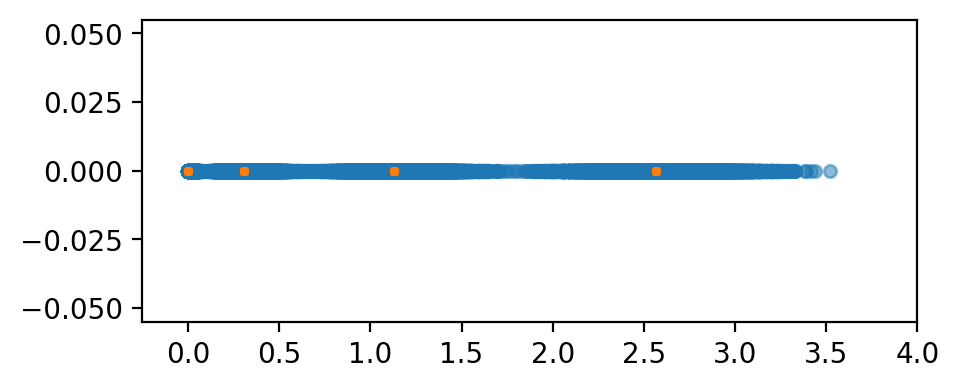


		SER is:  0.00298
SNRs are:  [20.010299956639813]
SERs are:  [0.00298]


In [ ]:
torch.set_printoptions(threshold=10_000)

def initialize_com_system(M=4,s_batch=32, R=60e9, EbN0_dB=5, init = 'sqam', 
                          dv = 4e6, mean = 0):
  chP = AttrDict()    # Channel parameters
  ## channel Parameters
  chP.M = M                      # Modulation order
  chP.batchSize = s_batch      # Size of the data stream to be transmitted (multiplied by M)
  chP.EbN0_dB = EbN0_dB
  chP.SNR = chP.EbN0_dB + 10*np.log10(np.log2(chP.M))
  chP.init = init
  chP.Del_v = dv
  chP.R = R      # Data rate
  chP.Ts = 1/chP.R    
  chP.mean = mean       # Phase noise mean
  chP.Factor = chP.Del_v*chP.Ts
  chP.var = 2 * np.pi * chP.Factor  # variance of probability distribution of noise
  print('Variance is: ',chP.var)
  chP.std = np.sqrt(chP.var)    # std-deviation of probability distribution of noise
  print('STD is: ',chP.std)

  return chP

def add_channel(amp, chP): 

  # Add Q component equal to zero to the signal vextor
  x = torch.complex(amp,torch.zeros_like(amp)).reshape(1,-1)
  
  # Genereate AWGN
  n = 1/torch.sqrt(torch.tensor(2)) * (torch.randn(x.shape[1]) + 1j * torch.randn(x.shape[1]))
  awgn = (torch.sqrt(torch.tensor(10**(-chP.SNR/10))) * n)

  ## Generate random initial phase 
  init_Phase = (0 - np.pi) * torch.rand(1) + np.pi
  
  # Wiener phae noise generation 
  del_phi = chP.mean + chP.std * torch.randn(x.shape[1]) # Random notmal noise with PN variance 
  phi = torch.zeros(x.shape[1])                      # Wiener ransom phase noise variance    
  phi[0] = del_phi[0] + init_Phase                   # Initial phase of the signal
  for i in range(x.shape[1]-1):
      phi[i+1]= phi[i]+del_phi[i]

  # Add Wiener phase noise and AWGN to the signal  
  PN = (x * torch.exp(1j*phi)) + awgn   

  # plt.figure(figsize=(3,3))
  # plt.scatter(awgn.real, awgn.imag)    
  # plt.show()        
  # print('PN shpae',PN[0,:10])

  # Photo detector output
  noisy_x = PN.real**2 + PN.imag**2

  return noisy_x

def SER_Monte_carlo_Standard(chP):

  symbol_size = int(np.log2(chP.M))
  TotoalSymbolCount = 0
  TotoalBitCount = 0
  Totla_S_error = 0
  Totla_B_error = 0    
  # n = 3000    # n should be at leat 2
  print('\n\n\t\t\t******************')
  print('\t\t\tEbN0 in dB is: ',chP.EbN0_dB)
  print('\t\t\tSNR in dB is: ',chP.SNR)
  i = 0
  Txpws=[]
  Rxpws=[]
  while Totla_S_error<100:
    i = i +1
    normalizedConst = get_normalized_initial_constellation(chP.M,chP.init)
    
   
    ## Get Random stream
    intTx = torch.randint(0,chP.M,(chP.batchSize,))
    TotoalSymbolCount += len(intTx)    

    ################################################################

    ## Modulate ##########
    modulated_symbols = normalizedConst[intTx].reshape(-1,1)    
    
    
    noisy_x = add_channel(modulated_symbols, chP) 
    # print(noisy_x.shape)
    # sys.exit()
    
    if i==1:
      plt.figure(figsize=(5,2), dpi=200)
      plt.xlim(-0.25, 4)
      plt.scatter(noisy_x, torch.zeros_like(noisy_x), alpha=.5,s=20)
      plt.scatter(modulated_symbols**2, torch.zeros_like(modulated_symbols),alpha=.5,s=5)      
      plt.show()  

        
    ################################################################
    ## Demodulate ###########
    cnt_amp = torch.abs(normalizedConst)**2
    
    Rx_amp = noisy_x #torch.norm(noisy_x, dim=1)
    
    received_int_stream=[]
    

    for i in range(Rx_amp.shape[1]):
      idx = torch.argmin(torch.abs(Rx_amp[0,i]-cnt_amp.reshape(1,-1)))     
      received_int_stream.append(idx)  
    received_int_stream = torch.stack(received_int_stream)

   
    ## Symbol Error count #######    
    s_errors = torch.sum(intTx!= received_int_stream)
    Totla_S_error += s_errors

  ser = Totla_S_error.item()/TotoalSymbolCount
  print('\n\t\tSER is: ',ser)   
  return ser
 
def main():
  chP = initialize_com_system(M=4,s_batch=50000, R=60e9, EbN0_dB=17, 
                              init = 'AEIMDD', dv = 5e7, mean = 0)
  SERs = []
  SNRs = []
  for chP.EbN0_dB in range(17,18,1):
    chP.SNR = chP.EbN0_dB + 10*np.log10(np.log2(chP.M))
    SER = SER_Monte_carlo_Standard(chP)
    SNRs.append(chP.SNR)
    SERs.append(SER)
  print('SNRs are: ', SNRs)
  print('SERs are: ', SERs)

if __name__ == "__main__":    
    main()

# AE Wiener + noise before Photo Detector

Variance is:  0.16755160819145565
std is:  0.4093306831785954
********************************
********************************
****** win size = 1***********
********************************
********************************

		*********************
		EbN0 =  17
		Main Training Started!!!
tensor([[0.3154605031],
        [0.2991392016],
        [1.6162842512],
        [1.0948174000]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 0
	 Current Loss is: 1.539301872253418
	 Current movement is: 5569.060546875
	 Current SER is: 0.7513671875
	 Best SER is: 0.7513671875


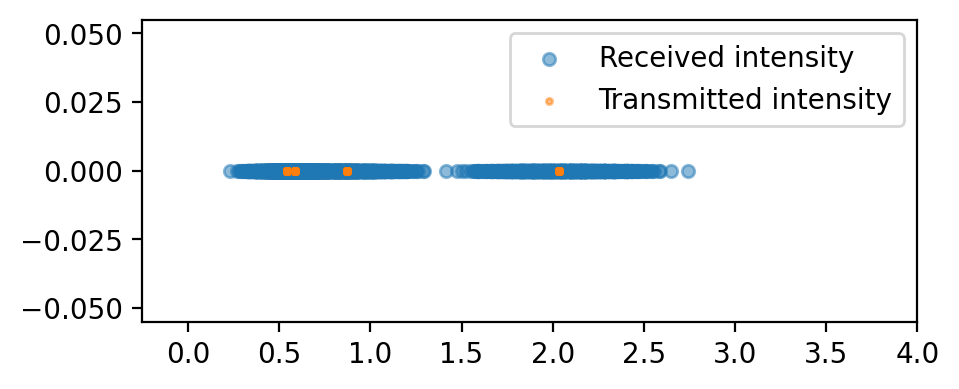

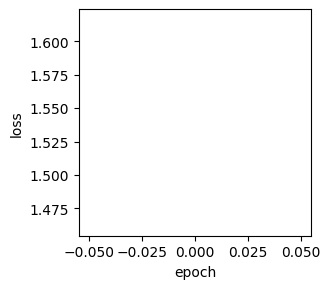

tensor([[1.0964683294],
        [0.1504636854],
        [1.5104534626],
        [0.7026013136]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 100
	 Current Loss is: 0.060339946299791336
	 Current movement is: 2285.296630859375
	 Current SER is: 0.0023828125
	 Best SER is: 0.0023828125


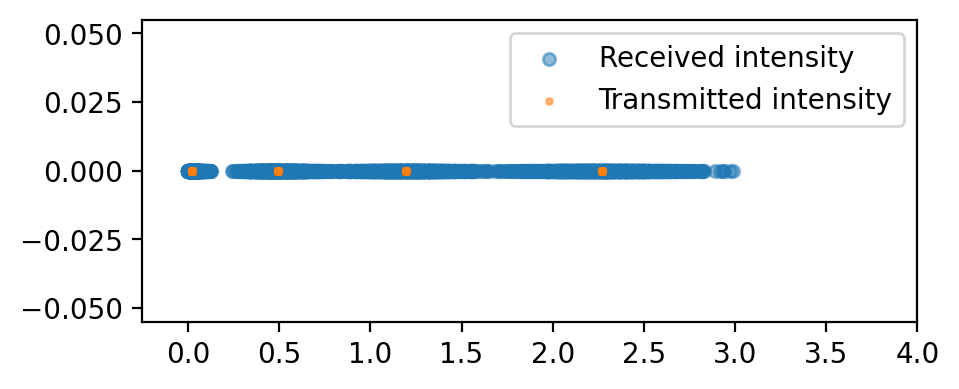

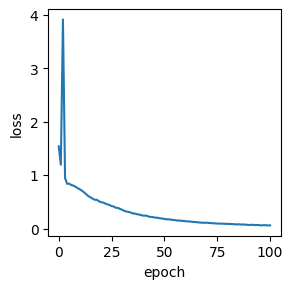

tensor([[1.0937731266],
        [0.1146172062],
        [1.5305283070],
        [0.6693324447]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 200
	 Current Loss is: 0.015451429411768913
	 Current movement is: 2431.5576171875
	 Current SER is: 0.0015625
	 Best SER is: 0.0015625


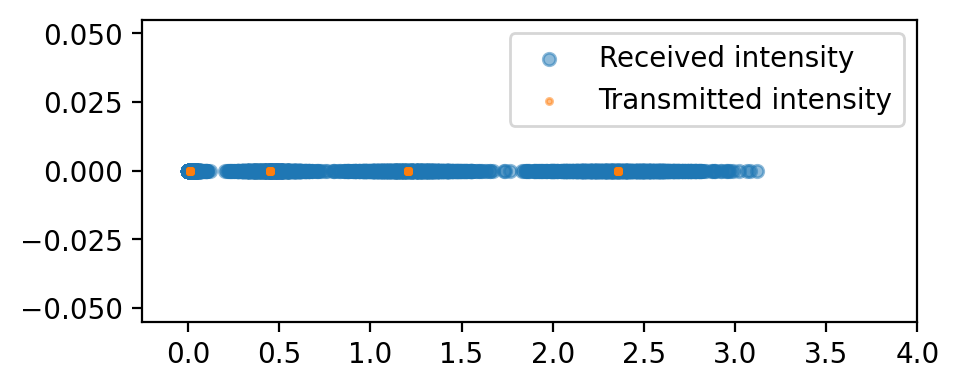

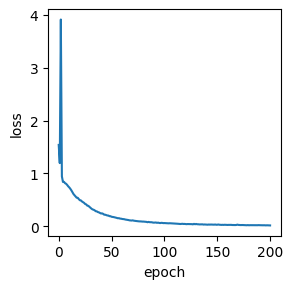

tensor([[1.0895928144],
        [0.0882772654],
        [1.5455286503],
        [0.6452406049]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 300
	 Current Loss is: 0.005976661574095488
	 Current movement is: 2477.282470703125
	 Current SER is: 0.0008463541666666667
	 Best SER is: 0.0008463541666666667


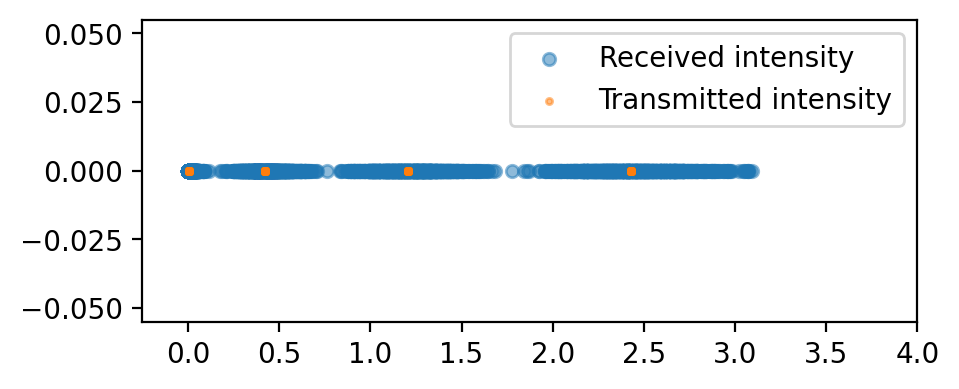

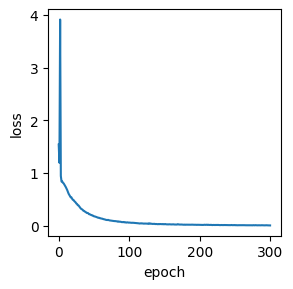

tensor([[1.0829657316],
        [0.0710300878],
        [1.5583922863],
        [0.6273384690]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 400
	 Current Loss is: 0.005119412671774626
	 Current movement is: 2522.55615234375
	 Current SER is: 0.000595703125
	 Best SER is: 0.000595703125


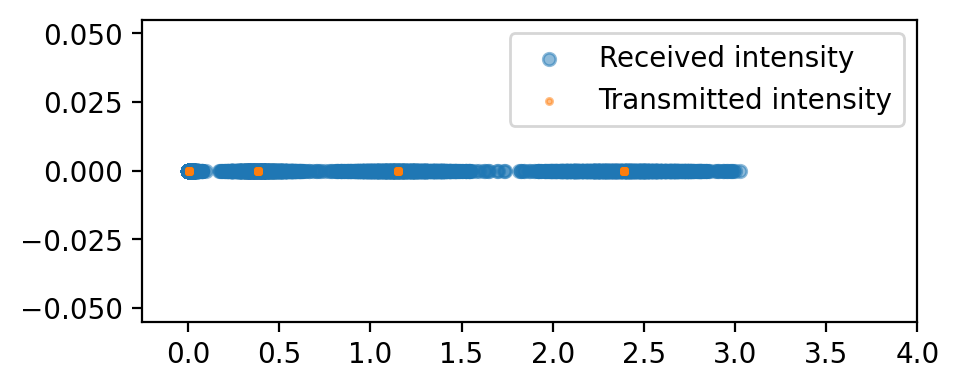

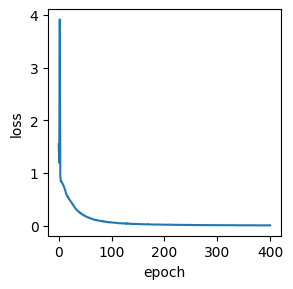

tensor([[1.0813385248],
        [0.0541578196],
        [1.5660837889],
        [0.6124989390]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 500
	 Current Loss is: 0.0025401960592716932
	 Current movement is: 2516.554443359375
	 Current SER is: 0.0004375
	 Best SER is: 0.0004375


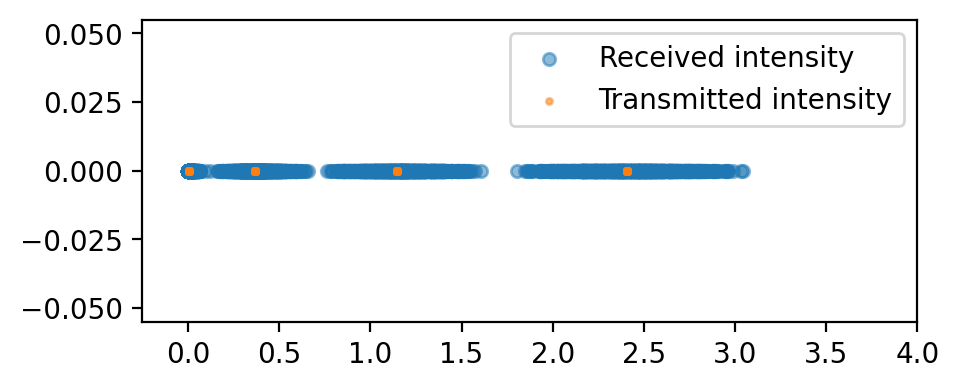

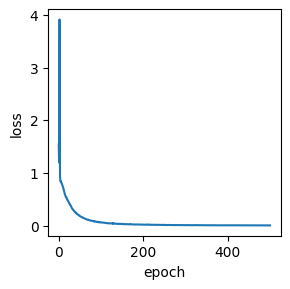

tensor([[1.0761089325],
        [0.0334378928],
        [1.5785661936],
        [0.5907627940]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 600
	 Current Loss is: 0.0013030536938458681
	 Current movement is: 2643.22265625
	 Current SER is: 0.00036458333333333335
	 Best SER is: 0.00036458333333333335


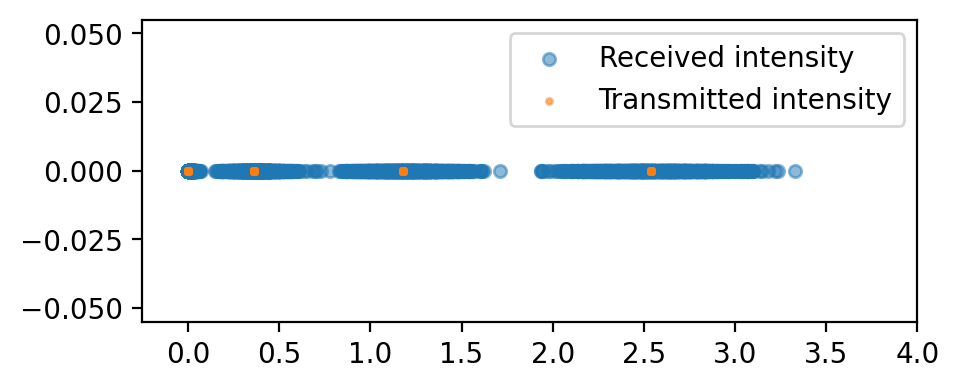

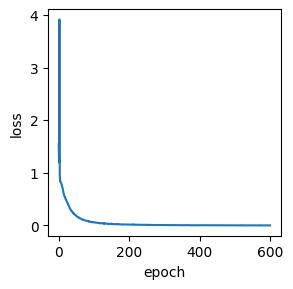

tensor([[1.0743159056],
        [0.0231871381],
        [1.5831053257],
        [0.5823103189]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 700
	 Current Loss is: 0.0015578300226479769
	 Current movement is: 2644.427734375
	 Current SER is: 0.00023871527777777777
	 Best SER is: 0.00023871527777777777


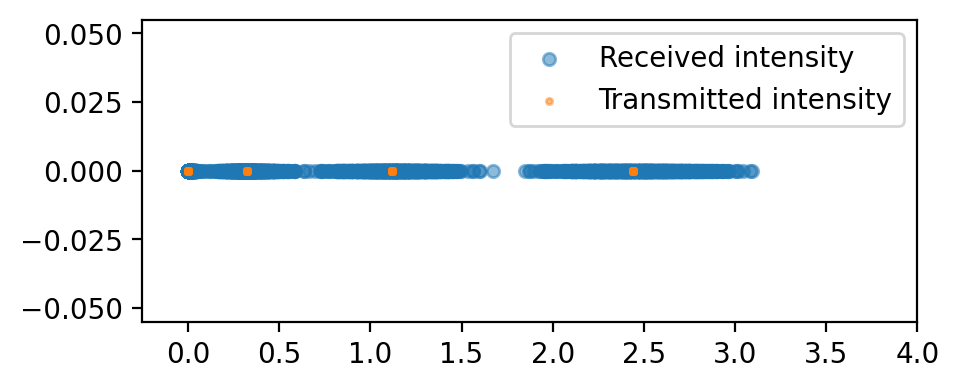

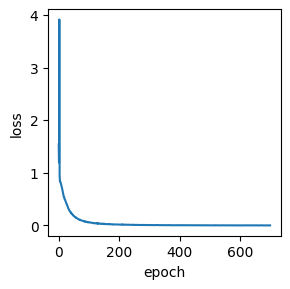

tensor([[1.0729111433],
        [0.0143966535],
        [1.5887361765],
        [0.5697121620]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 800
	 Current Loss is: 0.0008746511302888393
	 Current movement is: 2602.21533203125
	 Current SER is: 0.00022786458333333334
	 Best SER is: 0.00022786458333333334


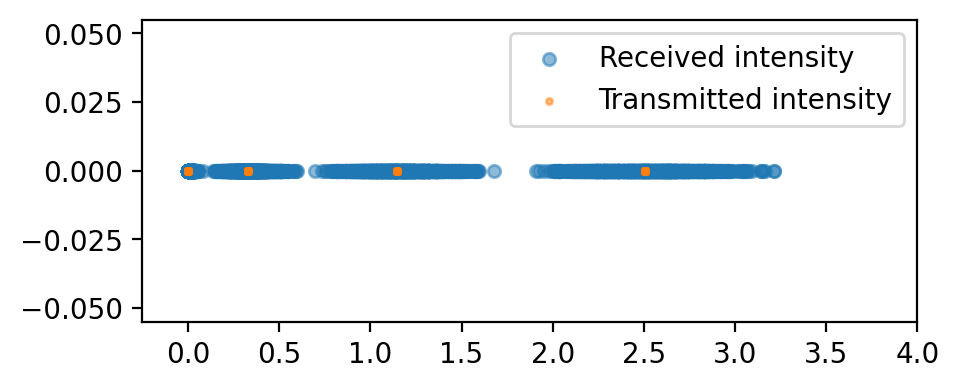

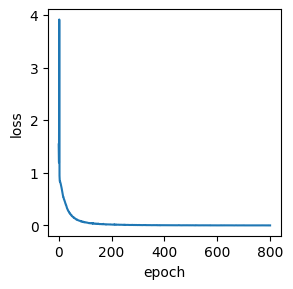

tensor([[1.0679697990],
        [0.0156865437],
        [1.5928763151],
        [0.5673966408]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 900
	 Current Loss is: 0.0013972686138004065
	 Current movement is: 2686.378173828125
	 Current SER is: 0.00022352430555555556
	 Best SER is: 0.00022352430555555556


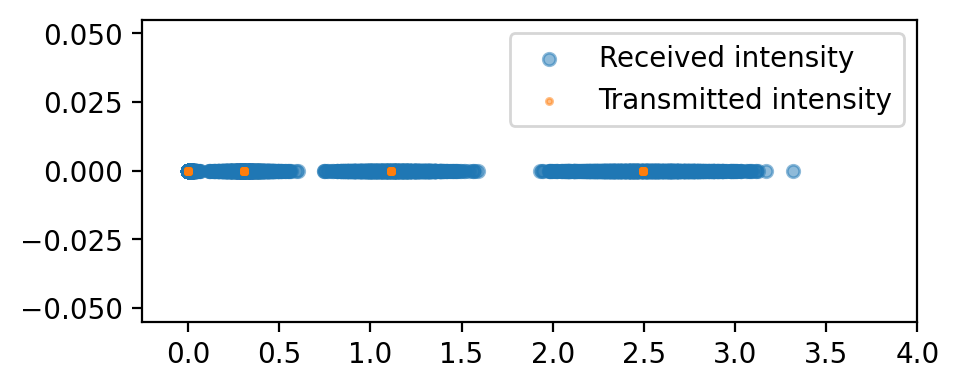

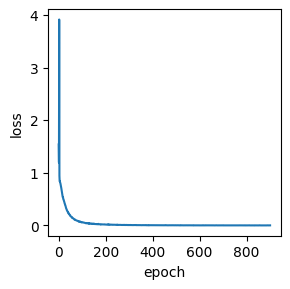

tensor([[1.0663273335],
        [0.0053707161],
        [1.5993154049],
        [0.5523657799]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 1000
	 Current Loss is: 0.00064765231218189
	 Current movement is: 2727.05078125
	 Current SER is: 0.00016438802083333333
	 Best SER is: 0.00016438802083333333


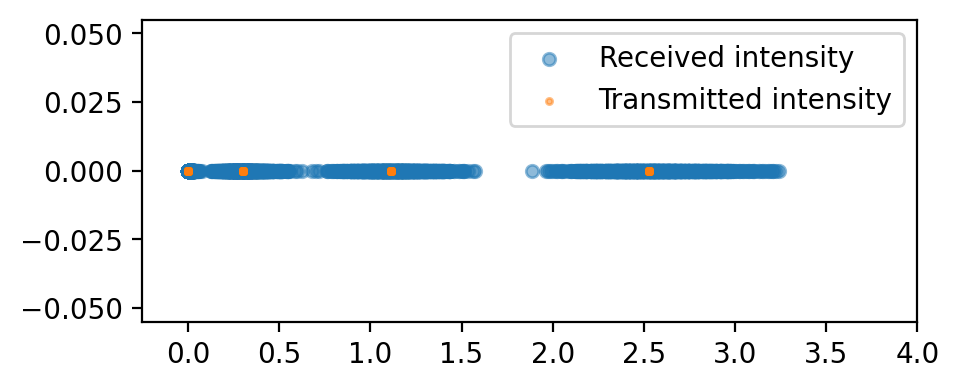

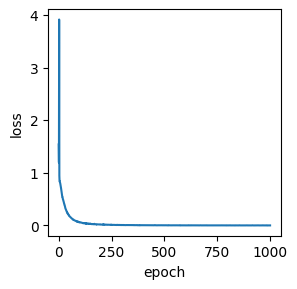


	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 1100
	 Current Loss is: 0.00020811618014704436
	 Current movement is: 2804.1826171875
	 Current SER is: 0.000244140625
	 Best SER is: 0.00016438802083333333


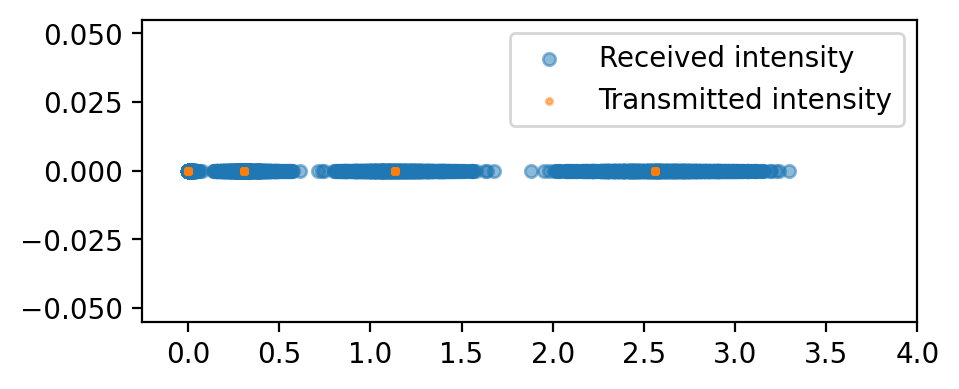

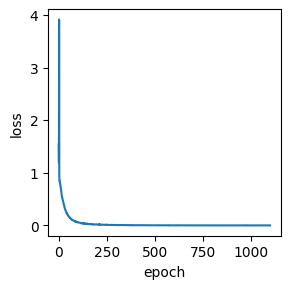


	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 1200
	 Current Loss is: 0.0007126450072973967
	 Current movement is: 2741.42529296875
	 Current SER is: 0.00016764322916666666
	 Best SER is: 0.00016438802083333333


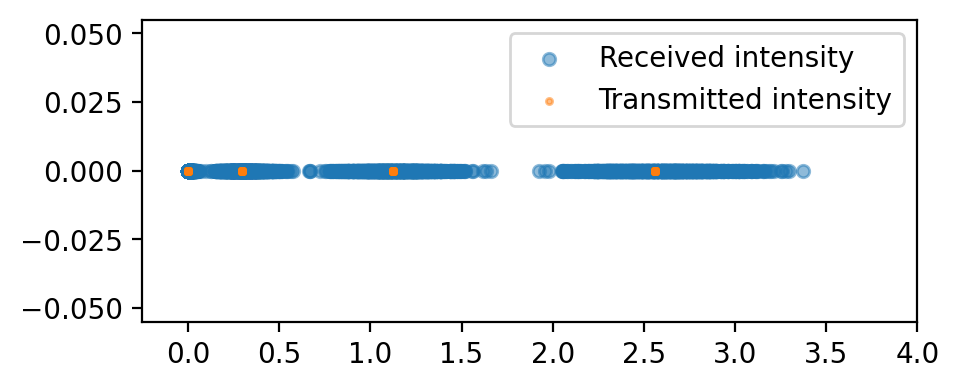

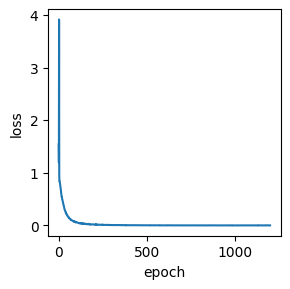

Epoch 01203: reducing learning rate of group 0 to 1.2500e-03.

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 1300
	 Current Loss is: 0.00039198261220008135
	 Current movement is: 2781.5546875
	 Current SER is: 0.00019353693181818182
	 Best SER is: 0.00016438802083333333


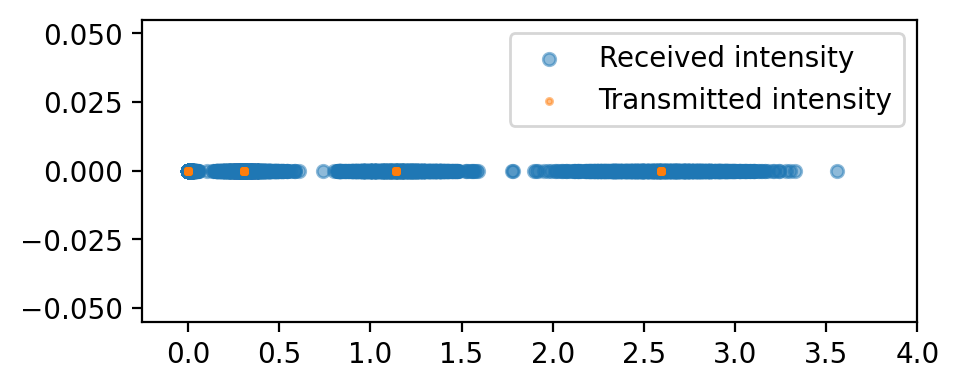

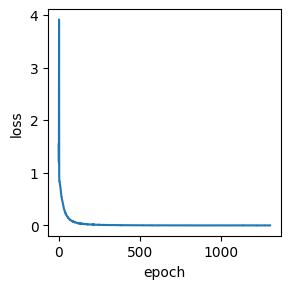


	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 1400
	 Current Loss is: 0.00037730575422756374
	 Current movement is: 2717.55078125
	 Current SER is: 0.00017933238636363635
	 Best SER is: 0.00016438802083333333


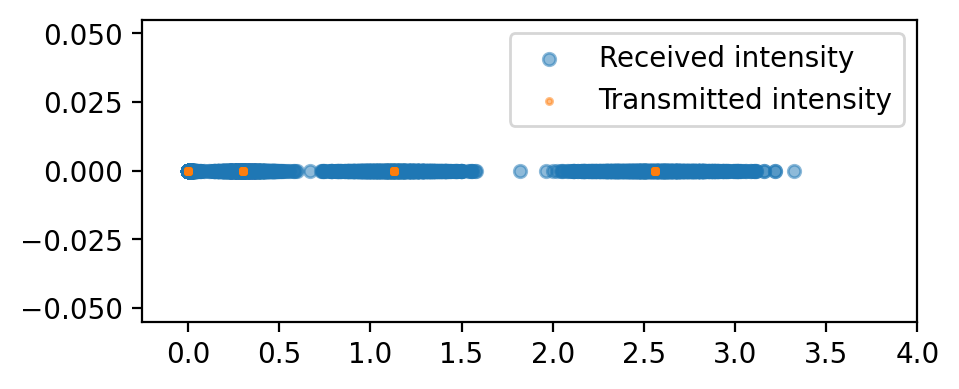

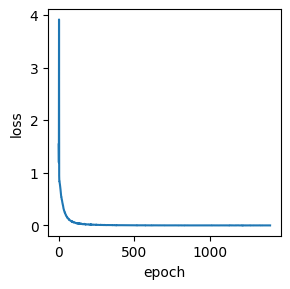

Epoch 01471: reducing learning rate of group 0 to 3.1250e-04.
tensor([[1.0620514154e+00],
        [3.8638105616e-04],
        [1.6014418602e+00],
        [5.5446439981e-01]])

	 Eb/N0: 17

	 SNR: 20.010299956639813

	 Itteration number: 1500
	 Current Loss is: 0.0006305793649517
	 Current movement is: 2764.171142578125
	 Current SER is: 0.00015474759615384615
	 Best SER is: 0.00015474759615384615


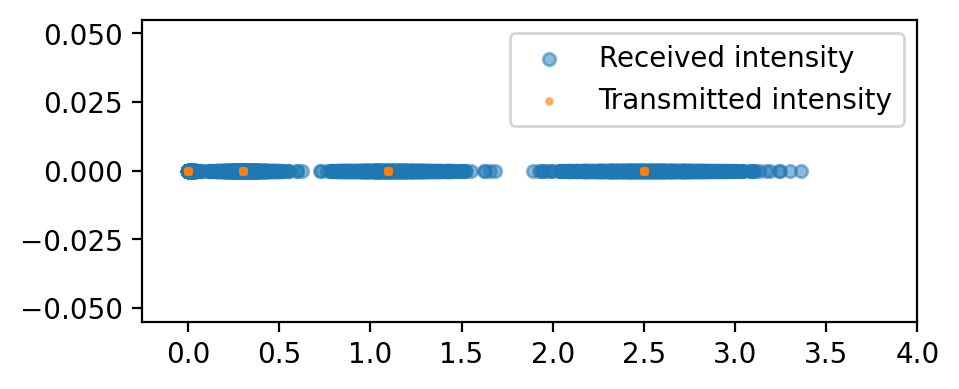

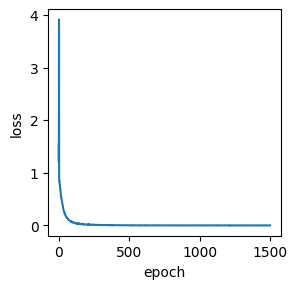



			Training is done


########### Final Best Results #########################
****** Bests are ******
SERs1: [0.00015475]
SNRs1 = [20.010299956639813]


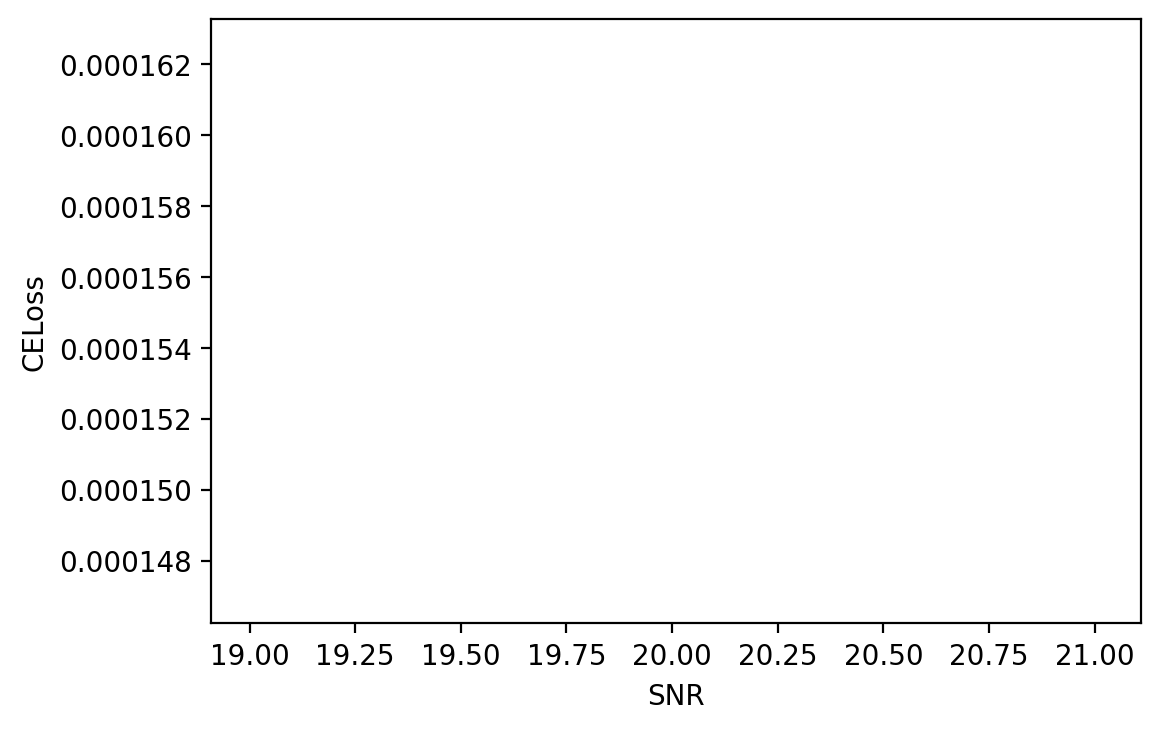

In [ ]:
torch.set_printoptions(precision=10)
torch.random.manual_seed(72)
np.random.seed(72)

############################################################
## Class of Parameters
class ConstellationNet(nn.Module):
    """
    This Class creates an Autoencoder srtucture which is used to 
    train an End-to-End communication system.
    """
    def __init__(self, trP=AttrDict(), chP= AttrDict()):
        """
        Create an Autoencoder.

        :param order: Order of the constellation, i.e. the number of 
        messages that are to be transmitted, or equivalently the number
        of symbols whose placements in the constellation have to be 
        learned.

        :param encoder_layers: Shape of the encoder’s hidden layers. 
        The size of this sequence is the number of hidden layers, with
        each element being a number which specifies the number of 
        neurons in its channel.

        :param decoder_layers: Shape of the decoder’s hidden layers. 
        Uses the same convention as `encoder_layers_sizes` above.
        """
        super(ConstellationNet, self).__init__()
        self.trP = trP
        self.chP = chP
        self.encoder_layers = trP.layers
        self.decoder_layers = self.encoder_layers[::-1]
      
        self.prev_layer_size = self.trP.M*self.trP.winSize
        # print('input: ',self.trP.M*self.trP.winSize)
        self.encoder_layers_list = []

        for self.layer_size in self.encoder_layers:
            self.encoder_layers_list.append(nn.Linear(self.prev_layer_size, self.layer_size,bias=True))            
            self.encoder_layers_list.append(nn.BatchNorm1d(self.layer_size))            
            self.encoder_layers_list.append(trP.activation)            
            
            self.prev_layer_size = self.layer_size

        self.encoder_layers_list += [nn.Linear(self.prev_layer_size, 1), ]

        self.encoder = nn.Sequential(*self.encoder_layers_list)
        #########################################################################
        # Build the decoder network taking the noisy I/Q vector received from
        # the channel as input and outputting a probability vector for each
        # original message. The network additionally uses hidden layers as
        # specified in `decoder_layers`
        #########################################################################
        self.prev_layer_size = 1*self.trP.winSize
        self.decoder_layers_list = []

        for self.layer_size in self.decoder_layers:
            self.decoder_layers_list.append(nn.Linear(self.prev_layer_size, self.layer_size,bias=True))
            self.decoder_layers_list.append(nn.BatchNorm1d(self.layer_size))
            self.decoder_layers_list.append(trP.activation)
                     
            self.prev_layer_size = self.layer_size
           
        self.decoder_layers_list.append(nn.Linear(self.prev_layer_size, self.trP.M))    
  
        self.decoder = nn.Sequential(*self.decoder_layers_list)
        
    def normalize_power_real(self, x):
        """
        Normalization if constellation received in x is acomplished here.
        """ 
        epsilon = 1e-12
        average_power = (torch.sum(x**2))/(len(x))
        average_power = torch.max(torch.tensor([epsilon, average_power]))            
        normF = torch.rsqrt(average_power)#
        x = x * normF
        # plt.scatter(x[:,0],x[:,1])
        # print(x)
        # if trP.centered:       
        # center = torch.sum(x,0) / trP.M                  
        # x[:,0] -=center[0] 
        # x[:,1] -=center[1]
        return  x
    
    def centerize_symbols(self, x):
        ######################################################################
        #Center
        ######################################################################
        center = torch.mean(x,0)           
        x[:,0] -=center[0] 
        x[:,1] -=center[1]  

        return x
   
    def add_PN_channel(self,x):
        '''
        This function gets I/Q coordinates in real form
        and first converts them to complex form then both
        AWGN and Phase noise are generated and added to 
        the complex coordinates and finally the complex 
        coordinates are recovered into the real form and 
        returnd.
        '''
        
        # Add Q component equal to zero to the signal vextor
        x_comp = torch.complex(x,torch.zeros_like(x)).reshape(1,-1)
        # print('x_cmp: ',x_comp.shape)
        
        n = 1/torch.sqrt(torch.tensor(2)) * (torch.randn(x_comp.shape[1]) + 1j * torch.randn(x_comp.shape[1]))
        awgn = (torch.sqrt(torch.tensor(10**(-self.chP.SNR/10))) * n)

       
        ## Generate random initial phase 
        init_Phase = (0 - np.pi) * torch.rand(1) + np.pi

        
        del_phi = self.chP.mean + self.chP.std * torch.randn(x_comp.shape[1]) # fixed phase noise non random variance
        # print('Delta Phi: ', fix_phi)
        phi = torch.zeros(x_comp.shape[1])                          # Wiener ransom phase noise variance    
        phi[0] = del_phi[0] + init_Phase
        for i in range(x_comp.shape[1]-1):
            phi[i+1]= phi[i]+del_phi[i]

        # print('phi: ',phi.shape)

      

        ## add Phase plus awgn 
        
        
        PN = (x_comp * torch.exp(1j*phi)) + awgn

        noisy_x = PN.real**2 + PN.imag**2


        # PN = torch.abs(x_comp * torch.exp(1j*phi))**2        
        # phd = PN.
        # print('PN: ', PN.shape)
        # phd = PN.real**2 + PN.imag**2
        # print('noisy_x: ', noisy_x.shape)
        # print('\n\nX Norm:',torch.norm(x)**2/(2*len(x)))
        # print('PN Norm: ',(torch.sum(PN)/PN.shape[1]))
  
       
        # del PN, phi, n, x_comp
        ## convert complex to real 
        # noisy_xw_real = torch.zeros_like(x)
        # noisy_xw_real[:,0] = noisy_x_comp.real
        # noisy_xw_real[:,1] = noisy_x_comp.imag
             
  
        return noisy_x

    def get_decInp_win(self, x): 
      a = x.reshape(-1)
      # print(a.shape)
      # print(intTx)
      # for in range(a.shape[0]):
      # print('----------',(len(a)-self.trP.winSize*2)+1)
      win=[]
      for i in range(0,((len(a)-self.trP.winSize)+1),1):
        # print(i)
        win.append(a[i:i+self.trP.winSize])
        
      # print(win)
      win = torch.stack(win)
      ww = win.reshape(-1,self.trP.winSize)
      # print(ww)
      del win
      return ww

    
    def get_constellation(self):
        """
        Extract the symbol constellation out of the trained encoder.

        :return: Matrix containing `order` rows with the nᵗʰ one being the I/Q
        vector that is the result of encoding the nᵗʰ message.
        
        The center part forces the constellation to be centered to the origin 
        """
        with torch.no_grad():
            ######################################################################
            # List of training examples in form of tensor 
            # of integers (not shuffled) with size = order
            ######################################################################
            # classes_ordered = torch.arange(order)
            enc = self.encoder(messages_to_onehot(
                    torch.arange(0, self.chP.M),
                    self.chP.M
                )
            )        
            # enc = torch.abs(enc)
            # print(enc.shape)
            constellation =  self.normalize_power_real(torch.abs(enc))
            return constellation
        
      
    def forward(self, x):
        """
        Performs encoding and decoding of an input vector and compute its
        reconstructed vector.

        :param x: Original one-hot encoded data.
        
        :return: Reconstructed vector. This Vector Containd Scores of be ing '1' or '0'
        """        
        symbols = self.encoder(x) 
        symbols = torch.abs(symbols)
        
        # cent_symbols = self.centerize_symbols(symbols)
        
        normalizedSymbols = self.normalize_power_real(symbols)
        # print(len(normalizedSymbols))
        # print('AVG: ',torch.sum(normalizedSymbols)/normalizedSymbols.shape[0])
        # sys.exit()
        

        
        noisy_x_real =  self.add_PN_channel(normalizedSymbols)        
        # noisy_amp = self.normalize_power_real(noisy_x_real)
        # print('nz: ',noisy_x_real.shape)
        decInp = self.get_decInp_win(noisy_x_real)
        # print('seq: ',noisy_x_real.shape)
        # print('dec input: ', decInp.shape)
        ## phase recovery
        # PH_recovered = self.phase_recovery_data_aided(x_comp,noisy_x_comp)
        # PH_recovered = self.phase_recovery_Pilot_Based(noisy_x_comp,pilot_symbols)
        
        
        dc = self.decoder(decInp)
        return dc, normalizedSymbols, noisy_x_real

############################################################
def get_SER_BER_MC(model, chP, trP):
    """
    This function receives a constellation and a calculates
    Monte-Carlo BER 
    """
    
    
    ######################################################################
    # Initialization
    ######################################################################
    test_batch_size = 1000  
    bit_errors = 0
    bit_stream_size = 0
    N_symbols = 0
    sym_error_count = 0
    clip = ((trP.winSize-1)*2)

    Txpws = []
    Rxpws = []
    while sym_error_count < 100:
        ###      
        ######################################################################
        # Create Random data 
        ######################################################################
        intTx, win_onehotTx = get_training_dataset(trP, chP,'tst')
        Tx = intTx[:len(intTx)-clip]
        N_symbols += len(Tx)
        ######################################################################
        # Apply random data to the model
        ######################################################################
        model.eval()
        with torch.no_grad():        
            scores, cur_constel, noisy_symbols = model(win_onehotTx)


        m = nn.Softmax(dim=1)
        probabilities = m(scores)
       


        predictions = torch.zeros([len(probabilities), len(probabilities[0])], dtype=torch.float)       
        
        for i in range (len(probabilities)):  
            maximum_val, idx = torch.max(probabilities[i],dim=0)
            predictions[i][idx]=1

        ######################################################################
        # Received stream in integer form
        ######################################################################    
        intRx = torch.tensor([torch.where(r==1)[0][0] for r in predictions])

        ######################################################################
        # Symbol error count
        ######################################################################
        for i in range(len(intRx)): 
            if Tx[i] != intRx[i]:
                sym_error_count += 1
        
        ######################################################################
        # get Binary classes dataset using Bit Map
        ######################################################################
        # binary_classes_dataset2 = torch.zeros((len(received_int_stream),int(np.log2(chP.M))))
        # binary_received_stream2 = torch.zeros((len(received_int_stream),int(np.log2(chP.M))))
        # # print(binary_classes_dataset2.shape)
        # binary_classes_dataset2 = bits_map[classes_dataset,:]
        # binary_received_stream2 = bits_map[received_int_stream,:]
        # # print(binary_classes_dataset2[:5,:])
        # bit_stream_size = N_symbols * torch.log2(torch.tensor(chP.M, dtype=float))
        # bit_errors += torch.sum((binary_classes_dataset2 != binary_received_stream2))
        ######################################################################
        # Bit Error count
        ######################################################################
        # binary_classes_dataset = decimal_tensor_to_binary_tensor(classes_dataset,chP.M)
        # print('bin class: ', binary_classes_dataset.shape)
        # binary_received_stream = decimal_tensor_to_binary_tensor(received_int_stream,chP.M)
        # print('bin rec str: ', binary_received_stream.shape)
        # bit_stream_size = N_symbols * torch.log2(torch.tensor(chP.M, dtype=float))
        # bit_errors += torch.sum((binary_classes_dataset != binary_received_stream))
       
    ######################################################################
    # BER and BER
    ######################################################################
    SER = sym_error_count/N_symbols  
    # BER = bit_errors/bit_stream_size
    # print('---------------------------------------------------',chP.EbN0_dB)
    # print('##################################################################')
    # print('\t\t Monte Carlo SER for Eb/N0 {} {}QAM is: {}'.format(chP.EbN0_dB,chP.M,SER))
    # print('\t\t Monte Carlo BER for Eb/N0 {} {}QAM is: {}'.format(chP.EbN0_dB,chP.M,BER))
    # print('##################################################################')
    # plt.figure(dpi=200)
    # plt.plot(Txpws,c='r', label='Transmitted signal average power', alpha = 0.5)
    # plt.plot(Rxpws, c='b', label='Received signal average power', alpha = 0.5, linestyle='dashed')
    # # plt.ylim(-1,1)
    # plt.legend()
    # plt.show()    
    return SER

def get_training_dataset(trP, chP, dt):
  if dt=='train':
    bsize = trP.batchSize
  else:
    bsize = trP.TSTbatchSize
  intTx = torch.randint(0,trP.M,(bsize,))
  # print(intTx)
  win = []
  for i in range(len(intTx)-trP.winSize+1):
    win.append(intTx[i:i+trP.winSize])
  win = torch.stack(win).reshape(-1)
  # print(win.shape)
  onehotTx = messages_to_onehot(win,trP.M)
  win_onehotTx = onehotTx.reshape(-1,trP.M*trP.winSize)
  return intTx, win_onehotTx

def train(trP, chP):#, EncModel, DecModel):
   
    print('\t\tMain Training Started!!!')
    
    # Get Data (data is generated with sliding window of size trP.winSize)
    
    # print(dataSet)    
    model = ConstellationNet(trP = trP, chP = chP)
    
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.RMSprop(model.parameters(), lr=trP.learningRate)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        verbose=True, #  If True, prints a message to stdout for each update. Default: False.
        factor=0.25, # Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.1.
        patience=100, # Number of epochs with no improvement after which learning rate will be reduced. 
        cooldown=50, # Number of epochs to wait before resuming normal operation after lr has been reduced. Default: 0.
        threshold=1e-8 # Threshold for measuring the new optimum, to only focus on significant changes. Default: 1e-4.
    )
    clip = ((trP.winSize-1)*2)

    i = 0
    prev_constel = torch.zeros((trP.batchSize-int(clip/2),2))
    # print('prev: ', prev_constel.shape)
    total_change = float('inf')
    losses = []
    best_ser = float('inf')
    while i <= trP.itrs:                
        intTx, win_onehotTx = get_training_dataset(trP, chP,'train')
        # print('Input symbols: ', intTx.shape)
        # print('Slided win onehot: ', win_onehotTx.shape)
        
        model.train()
        
        model.eval()
        optimizer.zero_grad()
        
        predictions, cur_constel, noisy_sym = model(win_onehotTx)        
        # print('cur_constel: ', cur_constel.shape)
        # print('intTx: ', intTx[:len(intTx)-clip].shape)
        # print('Dec output: ', predictions.shape)
        
        
        loss = criterion(predictions, intTx[:len(intTx)-clip])  
        losses.append(loss.detach().numpy())

        loss.backward()        
        optimizer.step()
        scheduler.step(loss) ### Does the Update
       
        # cur_constel = model.get_constellation()
        # print('current: ',cur_constel.shape)
        total_change = (cur_constel - prev_constel).norm(dim=1).sum()
        prev_constel = cur_constel

        if i%(100)== 0:
            ser = get_SER_BER_MC(model, chP, trP)     
            if ser < best_ser: 
              best_ser = ser   
              print(model.get_constellation())
            plt.figure(figsize=(5,2),dpi=200)
            plt.xlim(-0.25,4)   # set the xlim to left, right
            # plt.ylim(-2.5,2.5)     # set the xlim to left, right                
            
            plt.scatter(noisy_sym.detach().numpy(), np.zeros_like(noisy_sym.detach().numpy()),s=20, alpha = .5, label='Received intensity');       
            plt.scatter(cur_constel.detach().numpy()**2,np.zeros_like(cur_constel.detach().numpy())**2,s=5, alpha = .5, label ='Transmitted intensity');       

            # plt.scatter(0,0,c='k');
            plt.title('')
            plt.legend()


            print('\n\t Eb/N0: {}'.format(chP.EbN0_dB))        
            print('\n\t SNR: {}'.format(chP.SNR))  
            
            print('\n\t Itteration number: {}'.format(i))        
            print('\t Current Loss is: {}'.format(loss))        
            print('\t Current movement is: {}'.format(total_change)) 
            print('\t Current SER is: {}'.format(ser)) 
            print('\t Best SER is: {}'.format(best_ser)) 
            # print('\n\t current constellatiuon is: {}'.format(prev_constel))        


            
        # if i%(100) == 0:
            
            # plt.figure(figsize=(5,2),dpi=150)
            # # plt.xlim(-2.5,2.5)   # set the xlim to left, right
            # # plt.ylim(-2.5,2.5)     # set the xlim to left, right                
            
            # plt.scatter(noisy_sym.detach().numpy(), np.zeros_like(noisy_sym.detach().numpy()),s=20, alpha = .5, label='Received intensity');       
            # plt.scatter(cur_constel.detach().numpy()**2,np.zeros_like(cur_constel.detach().numpy())**2,s=5, alpha = .5, label ='Transmitted intensity');       

            # # plt.scatter(0,0,c='k');
            # plt.title('')
            # plt.legend()

            # xs = np.arange(chP.M)

            # # zip joins x and y coordinates in pairs    
            # for j in (xs):
            #     label = ' {} '.format(j)
            #     plt.annotate(label, # this is the text
            #                 (cur_constel[j,0],cur_constel[j,1]), # this is the point to label
            #                 textcoords="offset points", # how to position the text
            #                 xytext=(0,10), # distance from text to points (x,y)
            #                 ha='center') # horizontal alignment can be left, right or center                

            plt.show()
            plt.figure(figsize=(3,3),dpi=100)
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.plot(losses)
            plt.show()
              
        i=i+1
    print('\n\n\t\t\tTraining is done')   
    print('\n\n########### Final Best Results #########################')
    print('****** Bests are ******')
  
    return model, best_ser

################################################################
##################f##############################################
################################################################

def main():
  chP = AttrDict()    # Channel parameters
  trP = AttrDict()    # Machine Learning Parameters
  ######## channel Parameters
  chP.M = 4          # Modulation order
  chP.R = 60e9        # Data rate
  chP.Ts = 1/chP.R    
  chP.Del_v = 1.6e9    # Linewidth
  chP.mean = 0        # Phase noise mean
  chP.Factor = chP.Del_v*chP.Ts
  chP.var = 2 * np.pi * chP.Factor  # variance of probability distribution of noise
  print('Variance is: ',chP.var)
  chP.std = np.sqrt(chP.var)    # std-deviation of probability distribution of noise
  print('std is: ', chP.std)

  ######## Train Parameters
  
  trP.M = chP.M
  trP.learningRate = 0.005
  trP.layers = (64, )
  trP.activation  = nn.SELU()  
  trP.leastMovement = 0.0005
  trP.itrs = 1500
  trP.winSize = 4
  trP.batchSize = 4 * 256 * trP.winSize # to ensure that stream is devidable into winSize
  trP.TSTbatchSize = 50 * 256 * trP.winSize # to ensure that stream is devidable into winSize
  trP.strd_const = 'star'
  #################################################################
  ## Define color map
  c1 = np.random.rand(chP.M,4)
  c1[:,3] = 1
  for trP.winSize in range(1,2,1):
    print('********************************')
    print('********************************')
    print('****** win size = {}***********'.format(trP.winSize))
    print('********************************')
    print('********************************')
    loss_vector = []
    SNRs = []
    for chP.EbN0_dB in range(17,18,1):
      print('\n\t\t*********************\n\t\tEbN0 = ',chP.EbN0_dB)
      chP.SNR = chP.EbN0_dB + 10*np.log10(np.log2(chP.M)) # Because of nonbinary modulation
      model, ser= train(trP, chP)#, EncModel, DecModel)
      # get SER

      loss_vector.append(ser)
      SNRs.append(chP.SNR)
  
    print('SERs{}: {}'.format(trP.winSize,np.array(loss_vector)))
    print('SNRs{} = {}'.format(trP.winSize,SNRs))
    plt.figure(figsize=(6,4),dpi=200)
    plt.xlabel('SNR')
    plt.ylabel('CELoss')
    plt.plot(SNRs,loss_vector)
    plt.show()

if __name__ == "__main__":      
    main()




# AE with ML receiver

In [1]:
torch.set_printoptions(precision=10)
torch.random.manual_seed(172)
np.random.seed(172)

############################################################
## Class of Parameters
class ConstellationNet(nn.Module):
    """
    This Class creates an Autoencoder srtucture which is used to 
    train an End-to-End communication system.
    """
    def __init__(self, trP=AttrDict(), chP= AttrDict()):
        """
        Create an Autoencoder.

        :param order: Order of the constellation, i.e. the number of 
        messages that are to be transmitted, or equivalently the number
        of symbols whose placements in the constellation have to be 
        learned.

        :param encoder_layers: Shape of the encoder’s hidden layers. 
        The size of this sequence is the number of hidden layers, with
        each element being a number which specifies the number of 
        neurons in its channel.

        :param decoder_layers: Shape of the decoder’s hidden layers. 
        Uses the same convention as `encoder_layers_sizes` above.
        """
        super(ConstellationNet, self).__init__()
        self.trP = trP
        self.chP = chP
        self.encoder_layers = trP.layers
        self.decoder_layers = self.encoder_layers[::-1]
      
        self.prev_layer_size = self.trP.M*self.trP.winSize
        self.encoder_layers_list = []

        for self.layer_size in self.encoder_layers:
            self.encoder_layers_list.append(nn.Linear(self.prev_layer_size, self.layer_size,bias=True))            
            self.encoder_layers_list.append(nn.BatchNorm1d(self.layer_size))            
            self.encoder_layers_list.append(trP.activation)            
            
            self.prev_layer_size = self.layer_size

        self.encoder_layers_list += [nn.Linear(self.prev_layer_size, 1), ]

        self.encoder = nn.Sequential(*self.encoder_layers_list)
        #########################################################################
        # Build the decoder network taking the noisy I/Q vector received from
        # the channel as input and outputting a probability vector for each
        # original message. The network additionally uses hidden layers as
        # specified in `decoder_layers`
        #########################################################################
        self.prev_layer_size = 1*self.trP.winSize
        self.decoder_layers_list = []

        for self.layer_size in self.decoder_layers:
            self.decoder_layers_list.append(nn.Linear(self.prev_layer_size, self.layer_size,bias=False))
            # self.decoder_layers_list.append(nn.BatchNorm1d(self.layer_size))
            # self.decoder_layers_list.append(trP.activation)
                     
            self.prev_layer_size = self.layer_size
           
        self.decoder_layers_list.append(nn.Linear(self.prev_layer_size, self.trP.M))    
  
        self.decoder = nn.Sequential(*self.decoder_layers_list)
        
    def normalize_power_real(self, x):
        """
        Normalization if constellation received in x is acomplished here.
        """ 
        epsilon = 1e-12        
        average_power = (torch.sum(x**2))/(len(x))
        average_power = torch.max(torch.tensor([epsilon, average_power]))            
        normF = torch.rsqrt(average_power)#
        x = x * normF
        # plt.scatter(x[:,0],x[:,1])
        # print(x)
        # if trP.centered:       
        # center = torch.sum(x,0) / trP.M                  
        # x[:,0] -=center[0] 
        # x[:,1] -=center[1]
        return  x
    
    def centerize_symbols(self, x):
        ######################################################################
        #Center
        ######################################################################
        center = torch.mean(x,0)           
        x[:,0] -=center[0] 
        x[:,1] -=center[1]  

        return x
   
    def add_PN_channel(self,x):
        '''
        This function gets I/Q coordinates in real form
        and first converts them to complex form then both
        AWGN and Phase noise are generated and added to 
        the complex coordinates and finally the complex 
        coordinates are recovered into the real form and 
        returnd.
        '''
        
        # Add Q component equal to zero to the signal vextor
        x_comp = torch.complex(x,torch.zeros_like(x)).reshape(1,-1)
        # print('x_cmp: ',x_comp.shape)
        
        n = 1/torch.sqrt(torch.tensor(2)) * (torch.randn(x_comp.shape[1])) #+ 1j * torch.randn(x_comp.shape[1]))
        awgn = (torch.sqrt(torch.tensor(10**(-self.chP.SNR/10))) * n)

       
        ## Generate random initial phase 
        init_Phase = (0 - np.pi) * torch.rand(1) + np.pi

        
        del_phi = self.chP.mean + self.chP.std * torch.randn(x_comp.shape[1]) # fixed phase noise non random variance
        # print('Delta Phi: ', fix_phi)
        phi = torch.zeros(x_comp.shape[1])                          # Wiener ransom phase noise variance    
        phi[0] = del_phi[0] + init_Phase
        for i in range(x_comp.shape[1]-1):
            phi[i+1]= phi[i]+del_phi[i]

        # print('phi: ',phi.shape)

      

        ## add Phase plus awgn 
        
        
        PN = (x_comp * torch.exp(1j*phi)) 

        phd = PN.real**2 + PN.imag**2


        noisy_x = phd + awgn


        # PN = torch.abs(x_comp * torch.exp(1j*phi))**2        
        # phd = PN.
        # print('PN: ', PN.shape)
        # phd = PN.real**2 + PN.imag**2
        # print('noisy_x: ', noisy_x.shape)
        # print('\n\nX Norm:',torch.norm(x)**2/(2*len(x)))
        # print('PN Norm: ',(torch.sum(PN)/PN.shape[1]))
  
       
        # del PN, phi, n, x_comp
        ## convert complex to real 
        # noisy_xw_real = torch.zeros_like(x)
        # noisy_xw_real[:,0] = noisy_x_comp.real
        # noisy_xw_real[:,1] = noisy_x_comp.imag
             
  
        return noisy_x

    def get_decInp_win(self, x): 
      a = x.reshape(-1)
      # print(a.shape)
      # print(intTx)
      # for in range(a.shape[0]):
      # print('----------',(len(a)-self.trP.winSize*2)+1)
      win=[]
      for i in range(0,((len(a)-self.trP.winSize)+1),1):
        # print(i)
        win.append(a[i:i+self.trP.winSize])
        
      # print(win)
      win = torch.stack(win)
      ww = win.reshape(-1,self.trP.winSize)
      # print(ww)
      del win
      return ww
    
    def get_constellation(self):
        """
        Extract the symbol constellation out of the trained encoder.

        :return: Matrix containing `order` rows with the nᵗʰ one being the I/Q
        vector that is the result of encoding the nᵗʰ message.
        
        The center part forces the constellation to be centered to the origin 
        """
        with torch.no_grad():
            ######################################################################
            # List of training examples in form of tensor 
            # of integers (not shuffled) with size = order
            ######################################################################
            # classes_ordered = torch.arange(order)
            enc = self.encoder(messages_to_onehot(
                    torch.arange(0, self.chP.M),
                    self.chP.M
                )
            )        
            # enc = torch.abs(enc)
            # print(enc.shape)
            constellation =  self.normalize_power_real(enc)
            return constellation
        
    def getScores(self, x):
      x = x.reshape(1,-1)      
      cnt_amp = (torch.squeeze(self.get_constellation(), 1))**2
      # print('cnt_amp',cnt_amp.shape)
      # print('cnt_amp',cnt_amp)
      
      # print('x',x.shape)
      # print('x',x[0,-3:])


      d = torch.zeros((x.shape[1],len(cnt_amp)))

      for i in range(len(cnt_amp)):
        d[:,i] = torch.abs(x[0,:]-cnt_amp[i])+1
      d = 1/d**2 #torch.sqrt(d)
     
      # scores=[]
      # for i in range(x.shape[1]):
      #   tmp = (torch.abs(x[0,i]-cnt_amp))
      #   scores.append(tmp)
      # d = torch.stack(scores)     
      # print('d',d.shape)
      # print('d',d[-3:,:])
      # sys.exit()             
      # scores = torch.exp((-d**2)) / torch.sum(torch.exp(-d**2))
      return d

    def forward(self, x):
        """
        Performs encoding and decoding of an input vector and compute its
        reconstructed vector.

        :param x: Original one-hot encoded data.
        
        :return: Reconstructed vector. This Vector Containd Scores of be ing '1' or '0'
        """        
        
        symbols = self.encoder(x) 
        # a = self.get_constellation()
        # symbols = torch.abs(symbols)
        # print(symbols.shape)


        # cent_symbols = self.centerize_symbols(symbols)
        
        normalizedSymbols = self.normalize_power_real(symbols)
        # print(len(normalizedSymbols))
        # print('AVG: ',torch.sum(normalizedSymbols)/normalizedSymbols.shape[0])
        # sys.exit()
                
        noisy_x_real =  self.add_PN_channel(normalizedSymbols)        
        # noisy_amp = self.normalize_power_real(noisy_x_real)
        # print('nz: ',noisy_x_real.shape)
        decInp = self.get_decInp_win(noisy_x_real)
        

        softOut = self.getScores(decInp)


        # print('seq: ',noisy_x_real.shape)
        # print('dec input: ', decInp.shape)
        ## phase recovery
        # PH_recovered = self.phase_recovery_data_aided(x_comp,noisy_x_comp)
        # PH_recovered = self.phase_recovery_Pilot_Based(noisy_x_comp,pilot_symbols)
        
        
        # dc = self.decoder(decInp)     
        return softOut, normalizedSymbols, noisy_x_real

############################################################
def get_SER_BER_MC(model, chP, trP):
    """
    This function receives a constellation and a calculates
    Monte-Carlo BER 
    """
    
    
    ######################################################################
    # Initialization
    ######################################################################
    test_batch_size = 1000  
    bit_errors = 0
    bit_stream_size = 0
    N_symbols = 0
    sym_error_count = 0
    clip = ((trP.winSize-1)*2)

    Txpws = []
    Rxpws = []
    while sym_error_count < 100:
        ###      
        ######################################################################
        # Create Random data 
        ######################################################################
        intTx, win_onehotTx = get_training_dataset(trP, chP,'tst')
        Tx = intTx[:len(intTx)-clip]
        N_symbols += len(Tx)
        ######################################################################
        # Apply random data to the model
        ######################################################################
        model.eval()
        with torch.no_grad():        
            scores, cur_constel, noisy_symbols = model(win_onehotTx)


        m = nn.Softmax(dim=1)
        probabilities = m(scores)
       


        predictions = torch.zeros([len(probabilities), len(probabilities[0])], dtype=torch.float)       
        
        for i in range (len(probabilities)):  
            maximum_val, idx = torch.max(probabilities[i],dim=0)
            predictions[i][idx]=1

        ######################################################################
        # Received stream in integer form
        ######################################################################    
        intRx = torch.tensor([torch.where(r==1)[0][0] for r in predictions])

        ######################################################################
        # Symbol error count
        ######################################################################
        for i in range(len(intRx)): 
            if Tx[i] != intRx[i]:
                sym_error_count += 1
        
        ######################################################################
        # get Binary classes dataset using Bit Map
        ######################################################################
        # binary_classes_dataset2 = torch.zeros((len(received_int_stream),int(np.log2(chP.M))))
        # binary_received_stream2 = torch.zeros((len(received_int_stream),int(np.log2(chP.M))))
        # # print(binary_classes_dataset2.shape)
        # binary_classes_dataset2 = bits_map[classes_dataset,:]
        # binary_received_stream2 = bits_map[received_int_stream,:]
        # # print(binary_classes_dataset2[:5,:])
        # bit_stream_size = N_symbols * torch.log2(torch.tensor(chP.M, dtype=float))
        # bit_errors += torch.sum((binary_classes_dataset2 != binary_received_stream2))
        ######################################################################
        # Bit Error count
        ######################################################################
        # binary_classes_dataset = decimal_tensor_to_binary_tensor(classes_dataset,chP.M)
        # print('bin class: ', binary_classes_dataset.shape)
        # binary_received_stream = decimal_tensor_to_binary_tensor(received_int_stream,chP.M)
        # print('bin rec str: ', binary_received_stream.shape)
        # bit_stream_size = N_symbols * torch.log2(torch.tensor(chP.M, dtype=float))
        # bit_errors += torch.sum((binary_classes_dataset != binary_received_stream))
       
    ######################################################################
    # BER and BER
    ######################################################################
    SER = sym_error_count/N_symbols  
    # BER = bit_errors/bit_stream_size
    # print('---------------------------------------------------',chP.EbN0_dB)
    # print('##################################################################')
    # print('\t\t Monte Carlo SER for Eb/N0 {} {}QAM is: {}'.format(chP.EbN0_dB,chP.M,SER))
    # print('\t\t Monte Carlo BER for Eb/N0 {} {}QAM is: {}'.format(chP.EbN0_dB,chP.M,BER))
    # print('##################################################################')
    # plt.figure(dpi=200)
    # plt.plot(Txpws,c='r', label='Transmitted signal average power', alpha = 0.5)
    # plt.plot(Rxpws, c='b', label='Received signal average power', alpha = 0.5, linestyle='dashed')
    # # plt.ylim(-1,1)
    # plt.legend()
    # plt.show()    
    return SER

def get_training_dataset(trP, chP, dt):
  if dt=='train':
    bsize = trP.batchSize
  else:
    bsize = trP.TSTbatchSize
  int_ordered_sream = torch.arange(chP.M).repeat(bsize) 
  intTx = int_ordered_sream[torch.randperm(len(int_ordered_sream))]
  # intTx = torch.randint(0,trP.M,(bsize,))
  # print(intTx)
  win = []
  for i in range(len(intTx)-trP.winSize+1):
    win.append(intTx[i:i+trP.winSize])
  win = torch.stack(win).reshape(-1)
  # print(win.shape)
  onehotTx = messages_to_onehot(win,trP.M)
  win_onehotTx = onehotTx.reshape(-1,trP.M*trP.winSize)
  return intTx, win_onehotTx

def train(trP, chP):#, EncModel, DecModel):
   
    print('\t\tMain Training Started!!!')
    
    # Get Data (data is generated with sliding window of size trP.winSize)
    
    # print(dataSet)    
    model = ConstellationNet(trP = trP, chP = chP)
    
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.RMSprop(model.parameters(), lr=trP.learningRate)

    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
        optimizer, 
        verbose=True, #  If True, prints a message to stdout for each update. Default: False.
        factor=0.25, # Factor by which the learning rate will be reduced. new_lr = lr * factor. Default: 0.1.
        patience=100, # Number of epochs with no improvement after which learning rate will be reduced. 
        cooldown=50, # Number of epochs to wait before resuming normal operation after lr has been reduced. Default: 0.
        threshold=1e-8 # Threshold for measuring the new optimum, to only focus on significant changes. Default: 1e-4.
    )
    clip = ((trP.winSize-1)*2)

    i = 0
    prev_constel = torch.zeros((trP.batchSize*chP.M-int(clip/2),1))
    # print('prev: ', prev_constel.shape)
    total_change = float('inf')
    losses = []
    best_ser = float('inf')
    while i <= trP.itrs:                
        intTx, win_onehotTx = get_training_dataset(trP, chP,'train')
        # print('Input symbols: ', intTx.shape)
        # print('Slided win onehot: ', win_onehotTx.shape)
        
        model.train()
        
        model.eval()
        optimizer.zero_grad()
        
        predictions, cur_constel, noisy_sym = model(win_onehotTx)        
        # print('cur_constel: ', cur_constel.shape)
        # print('intTx: ', intTx[:len(intTx)-clip].shape)
        # print('Dec output: ', predictions.shape)
        
        
        loss = criterion(predictions, intTx[:len(intTx)-clip])  
        losses.append(loss.detach().numpy())

        loss.backward()        
        optimizer.step()
        scheduler.step(loss) ### Does the Update
       
        # cur_constel = model.get_constellation()
        # print('current: ',cur_constel.shape)
        total_change = (cur_constel - prev_constel).norm(dim=1).sum()
        prev_constel = cur_constel

        if i%(100)== 0:
            ser = get_SER_BER_MC(model, chP, trP)     
            if ser < best_ser: 
              best_ser = ser   
              plt.figure(figsize=(5,3),dpi=200)
            # plt.xlim(-0.25,4)   # set the xlim to left, right
            # plt.ylim(-2.5,2.5)     # set the xlim to left, right                
            
            plt.scatter(noisy_sym.detach().numpy(), np.zeros_like(noisy_sym.detach().numpy()),s=20, alpha = .5, label='Received intensity');       
            plt.scatter(cur_constel.detach().numpy()**2,np.zeros_like(cur_constel.detach().numpy())**2,s=5, alpha = .5, label ='Transmitted intensity');       
            plt.scatter(model.get_constellation()**2,np.zeros_like(model.get_constellation()),s=20, alpha = .5, label ='CNT');       
            plt.scatter(get_normalized_initial_constellation(chP.M, 'IMDD')**2,np.zeros_like(model.get_constellation()),s=20, alpha = .5, label ='IMDD');       
            # print('cnt: ',model.get_constellation())
            # print('encsss: ',cur_constel)

            # plt.scatter(0,0,c='k');
            plt.title('')
            plt.legend()
            # GMI, SNR = GMI_ML(model, chP)
            # gmi_sigmoid = get_GMI_MC(model, chP)
            # GMI = torch.max(gmi, gmi_sigmoid)

            print('\n\t Eb/N0: {}'.format(chP.EbN0_dB))        
            print('\n\t SNR: {}'.format(chP.SNR))  
            
            print('\n\t Itteration number: {}'.format(i))        
            print('\t Current Loss is: {}'.format(loss))        
            print('\t Current movement is: {}'.format(total_change)) 
            print('\t Current SER is: {}'.format(ser)) 
            print('\t Best SER is: {}'.format(best_ser)) 
            # print('\n\t current constellatiuon is: {}'.format(prev_constel))        


            
        # if i%(100) == 0:
            
            # plt.figure(figsize=(5,2),dpi=150)
            # # plt.xlim(-2.5,2.5)   # set the xlim to left, right
            # # plt.ylim(-2.5,2.5)     # set the xlim to left, right                
            
            # plt.scatter(noisy_sym.detach().numpy(), np.zeros_like(noisy_sym.detach().numpy()),s=20, alpha = .5, label='Received intensity');       
            # plt.scatter(cur_constel.detach().numpy()**2,np.zeros_like(cur_constel.detach().numpy())**2,s=5, alpha = .5, label ='Transmitted intensity');       

            # # plt.scatter(0,0,c='k');
            # plt.title('')
            # plt.legend()

            # xs = np.arange(chP.M)

            # # zip joins x and y coordinates in pairs    
            # for j in (xs):
            #     label = ' {} '.format(j)
            #     plt.annotate(label, # this is the text
            #                 (cur_constel[j,0],cur_constel[j,1]), # this is the point to label
            #                 textcoords="offset points", # how to position the text
            #                 xytext=(0,10), # distance from text to points (x,y)
            #                 ha='center') # horizontal alignment can be left, right or center                

            plt.show()
            plt.figure(figsize=(3,3),dpi=100)
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.plot(losses)
            plt.show()
              
        i=i+1
    print('\n\n\t\t\tTraining is done')   
    print('\n\n########### Final Best Results #########################')
    print('****** Bests are ******')
  
    return model, best_ser

################################################################
##################f##############################################
################################################################

def main():
  chP = AttrDict()    # Channel parameters
  trP = AttrDict()    # Machine Learning Parameters
  ######## channel Parameters
  chP.M = 4          # Modulation order
  chP.R = 60e9        # Data rate
  chP.Ts = 1/chP.R    
  chP.Del_v = 1e6    # Linewidth
  chP.mean = 0        # Phase noise mean
  chP.Factor = chP.Del_v*chP.Ts
  chP.var = 2 * np.pi * chP.Factor  # variance of probability distribution of noise
  print('Variance is: ',chP.var)
  chP.std = np.sqrt(chP.var)    # std-deviation of probability distribution of noise
  print('std is: ', chP.std)

  ######## Train Parameters
  
  trP.M = chP.M
  trP.learningRate = 0.005
  trP.layers = (64, )
  trP.activation  = nn.SELU()  
  trP.leastMovement = 0.0005
  trP.itrs = 1500
  trP.winSize = 1
  trP.batchSize = 256 * trP.winSize # to ensure that stream is devidable into winSize
  trP.TSTbatchSize = 256 * trP.winSize # to ensure that stream is devidable into winSize
  trP.strd_const = 'star'
  #################################################################
  ## Define color map
  c1 = np.random.rand(chP.M,4)
  c1[:,3] = 1
  for trP.winSize in range(1,2,1):
    print('********************************')
    print('********************************')
    print('****** win size = {}***********'.format(trP.winSize))
    print('********************************')
    print('********************************')
    loss_vector = []
    SNRs = []
    for chP.EbN0_dB in range(12,17,1):
      print('\n\t\t*********************\n\t\tEbN0 = ',chP.EbN0_dB)
      chP.SNR = chP.EbN0_dB + 10*np.log10(np.log2(chP.M)) # Because of nonbinary modulation
      model, ser= train(trP, chP)#, EncModel, DecModel)
      # get SER

      loss_vector.append(ser)
      SNRs.append(chP.SNR)
  
    print('SERs{}: {}'.format(trP.winSize,np.array(loss_vector)))
    print('SNRs{} = {}'.format(trP.winSize,SNRs))
    plt.figure(figsize=(6,4),dpi=200)
    plt.xlabel('SNR')
    plt.ylabel('CELoss')
    plt.plot(SNRs,loss_vector)
    plt.show()

if __name__ == "__main__":      
    main()




NameError: ignored

In [ ]:
a = torch.tensor([[-0.1292812228], [0.1473924220], [-0.0253318883]])

b = torch.tensor([0.2646794915, 3.7093241215, 0.0156446788, 0.0103514902])
print(a.shape)
c = torch.zeros((a.shape[0],len(b)))
print(c)
for i in range(len(b)):
  c[:,i] = -torch.abs(a[:,0]-b[i])
# c = torch.abs(c)
print(c)

torch.Size([3, 1])
tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])
tensor([[-0.3939607143, -3.8386054039, -0.1449259073, -0.1396327168],
        [-0.1172870696, -3.5619316101, -0.1317477375, -0.1370409280],
        [-0.2900113761, -3.7346560955, -0.0409765691, -0.0356833786]])
